<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
import wquantiles
import weightedstats as ws

import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from scipy.stats import t
from flask import Flask

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
## load the sat cv file
##create SAT dictionary with column names as key and the data under each column as the values
##   
with open('sat_scores.csv','r') as f:
        data = f.readlines()
        #data  = csv.reader(f)
        #for i in data:
         #   print(i)


data = [x.replace('\n','') for x in data]

header = data[0].split(",")

header
data = data[1:]
#header
#data

In [4]:
#data

In [ ]:
import pickle



In [5]:
#header

In [6]:
satdict = {}
satdict = { h:[r.split(',')[i] for r in data] for i,h in enumerate(header)}
#pprint(satdict)

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?


In [7]:
## make pandas DataFrame object SAT dictionary 
df_satdict = pd.DataFrame(satdict)
df_satdict.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [8]:
df_satdict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [9]:
#  another datframe with the pandas .read_csv() function
df = pd.read_csv('sat_scores.csv')
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
#dict1 = {"State": 'US State', 'Rate': "participation rate for each state ", 'Verbal': "Verbal score","Math": 'Math score'} 
#pprint(dict1)

## Answer
#Data dictionary-  provides a outline for each column, a short description gives the variable 

 Math: Math score, type: int64
 Rate: participation rate for each state , type: int64
 State: US State type: Object including string and other data types,
 Verbal: Verbal score type: int64



In [12]:
## Done just for practicing python dictionaries
data_dict1 = { 
            'State': {'type': df['State'].dtypes, 'desc':dict1['State']},
              "Rate" : {'type': df['Rate'].dtypes, 'desc':dict1['Rate']},
               "Verbal" :{'type': df['Verbal'].dtypes, 'desc':dict1['Verbal']},
              "Math": {'type': df['Math'].dtypes, 'desc':dict1['Math']}, 
             'shape': df.shape }

pprint(data_dict1)

{'Math': {'desc': 'Math score', 'type': dtype('int64')},
 'Rate': {'desc': 'participation rate for each state ', 'type': dtype('int64')},
 'State': {'desc': 'US State', 'type': dtype('O')},
 'Verbal': {'desc': 'Verbal score', 'type': dtype('int64')},
 'shape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

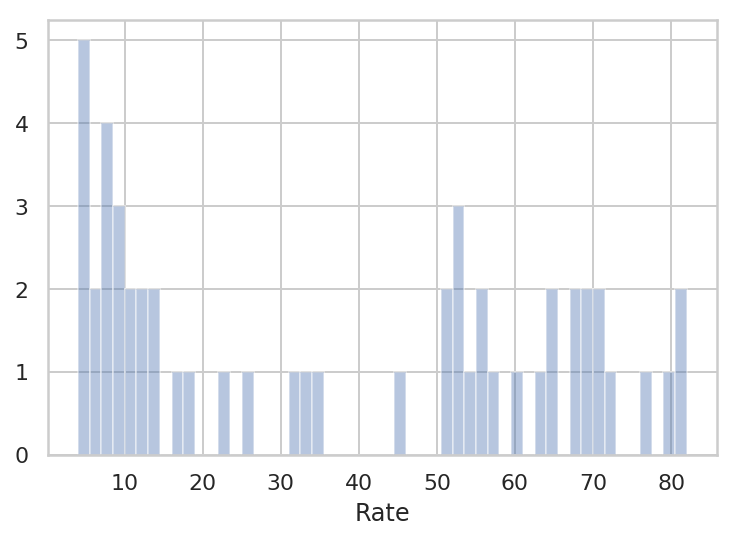

In [20]:
sns.distplot(df.Rate,bins=52, kde = False)

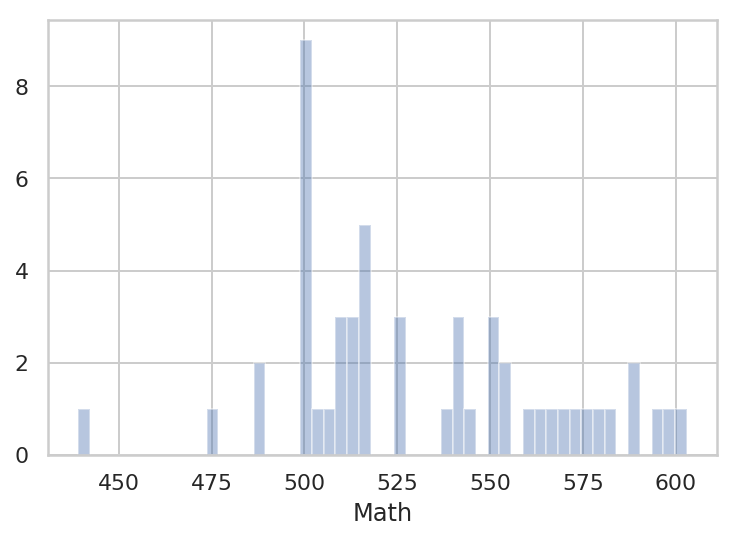

In [21]:
sns.distplot(df.Math,bins=52, kde = False)

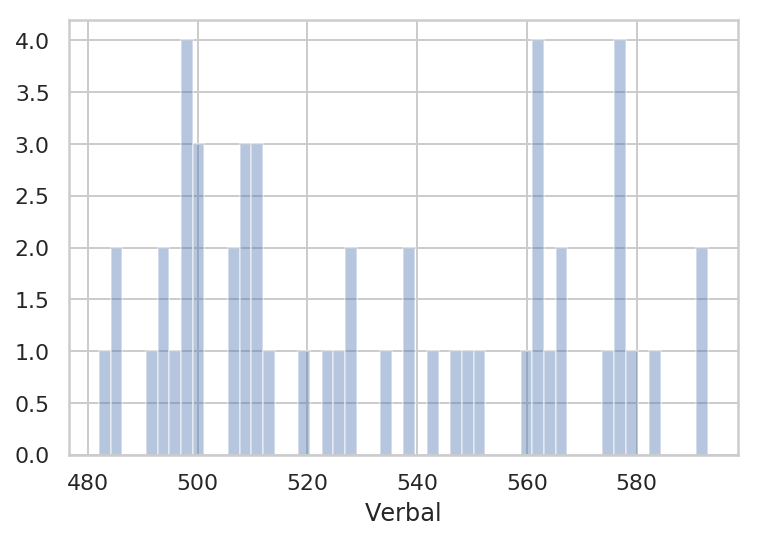

In [22]:
sns.distplot(df.Verbal,bins=52, kde = False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


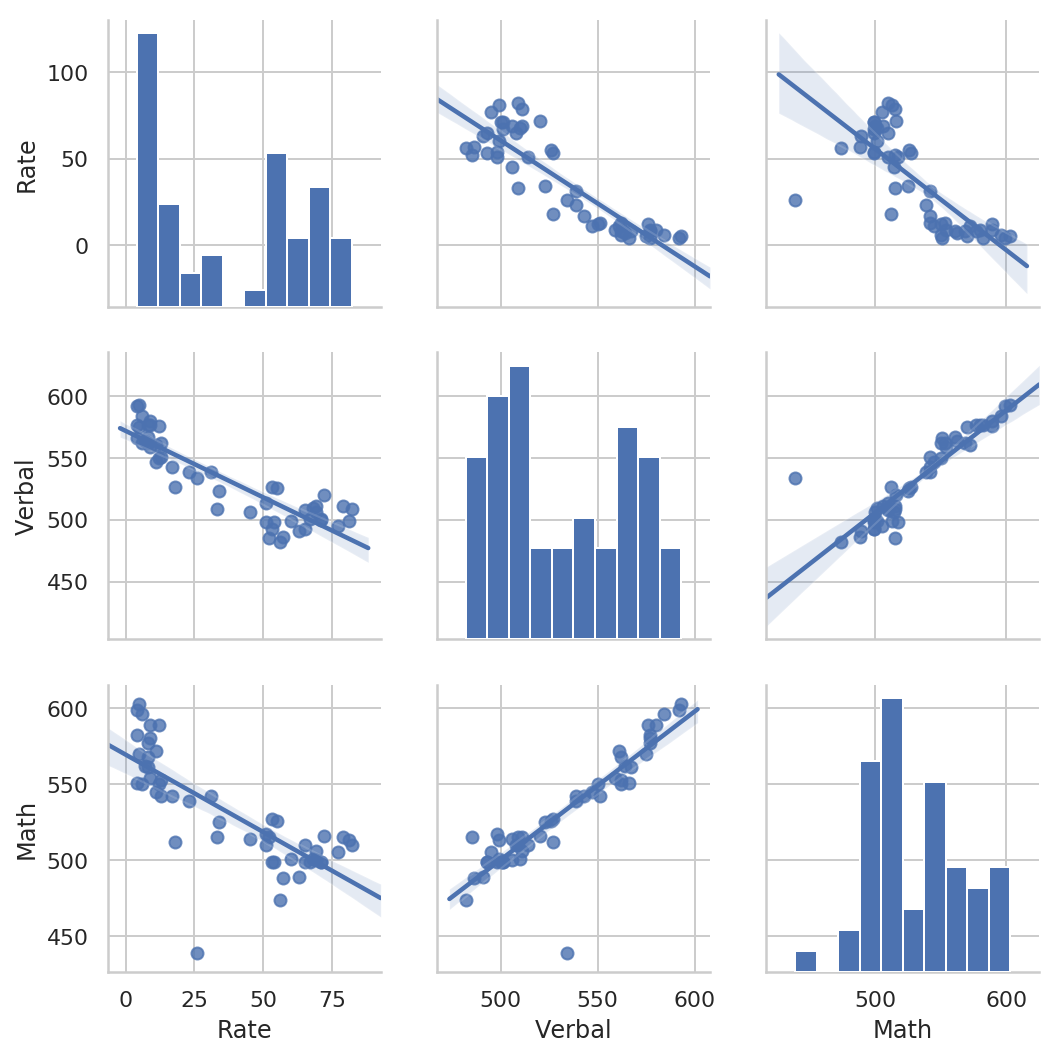

In [16]:
#sns.pairplot(df)
sns.pairplot(df,kind ='reg') 
             #style="ticks", color_codes=True)

 ### pairpolot shows correlation 
# Negative correlation for Rate
# # 






In [23]:
df.corr() 

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


## Answer

Above pairplot shows correlation ...together with df.corr() function gives the values
 Negative correlation for Rate with Verbal and Math
 Positive co-relation for Verbal and math
 Histograms shows the frequencies of values for each colimn



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

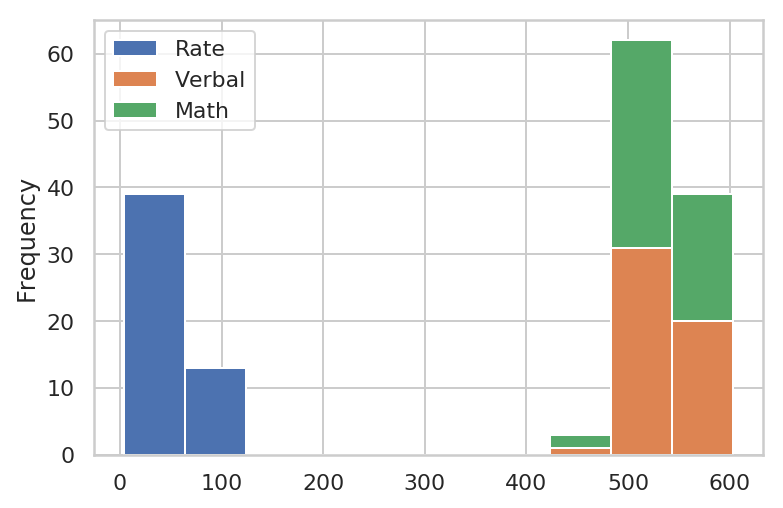

In [24]:
df.plot(kind= "hist",stacked = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

Answer: Using a box plot   can identify the outliers, qunatiles, 25%,50% % 75% 

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

State is a string value, Scaling is also different. 

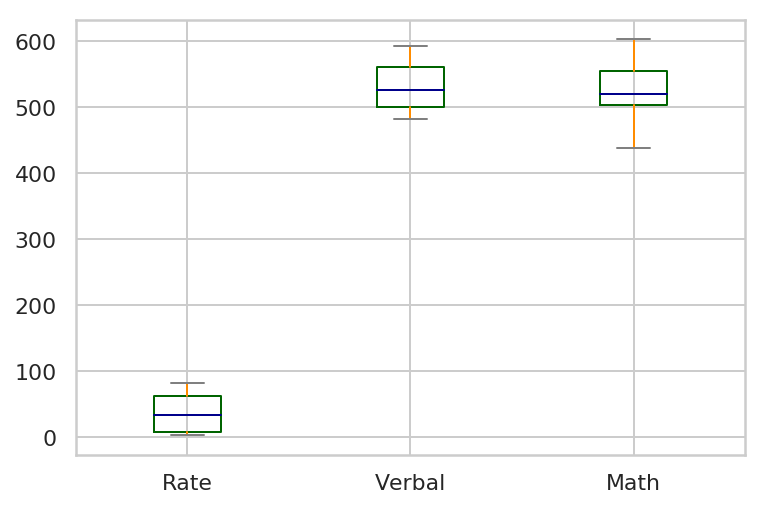

In [67]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}


df.plot.box(color = color, sym='r+')

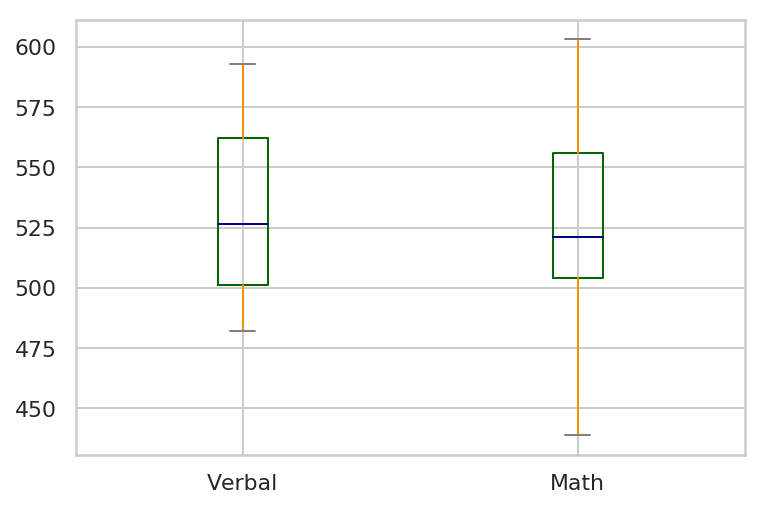

In [69]:
dfVM.plot.box(color = color, sym='r+')

In [75]:
df.describe()
# as seen below Quantiles are skipped for string value in the describe funstion

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


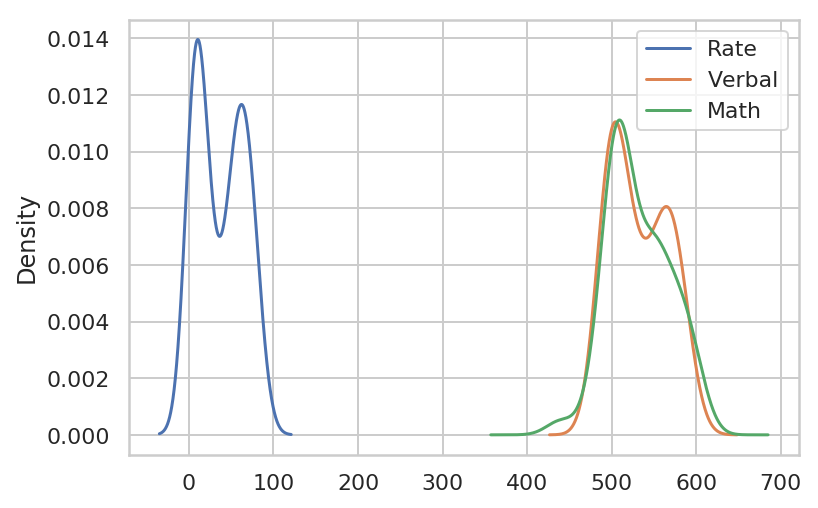

In [63]:
df.plot.kde()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


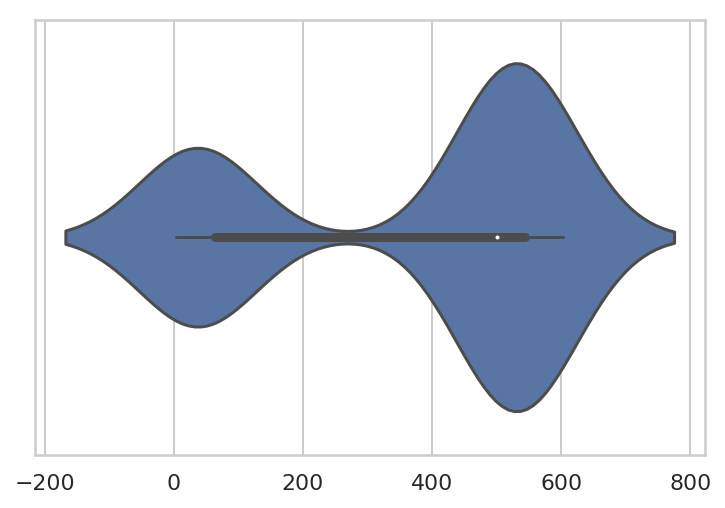

In [88]:
dfVMR = df[['Rate','Verbal', 'Math' ]]

sns.violinplot(dfVMR, inner = 'box')

#fig,ax =  plt.subplots()
#ax3 = ax.twinx()


#df.plot(kind= "box", secondary_y = True, logx = True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [30]:
#  usage --df[df['col'] > 0.5]
print('  Count  & list of states that have Verbal scores greater than the average of Verbal scores across states')
print(df[df['Verbal'] > np.mean(df['Verbal'])].count())

##df['col'].count()   number of non null values
#print('Number of states with verbal scores above average:' +    str('count')


L_ST =  df[df['Verbal'] > np.mean(df['Verbal'])]
L_ST['State']


  Count  & list of states that have Verbal scores greater than the average of Verbal scores across states
State     24
Rate      24
Verbal    24
Math      24
dtype: int64


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [32]:
print('number of states with Verbal scores > median' + str(df[df['Verbal'] > np.median(df['Verbal'])].count()))
df[df['Verbal'] > np.median(df['Verbal'])].count()
#  number is 26 
###WHY  this number is different from mean
L_ST_GT_MED = df[df['Verbal'] > np.median(df['Verbal'])]
print(L_ST_GT_MED['State'])




number of states with Verbal scores > medianState     26
Rate      26
Verbal    26
Math      26
dtype: int64
19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object


In [38]:
## Median is greater than mean    26 > 24  due to skew
L_MEAN = list(L_ST['State'])
L_MED =  list(L_ST_GT_MED['State'])


Inter = L_MEAN or L_MED 
Inter

#NotInter =  Inter or L_MED
#NotInter

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

changed to VerbalMinusMath   tough to get the of number of spaces right each time  

In [118]:
df['VerbalMinusMath'] = df['Verbal'] - df['Math']
df.head(3)


,State,Rate,Verbal,Math,Verbal - Math,VerbalMinusMath
0,CT,82,509,510,-1,-1
1,NJ,81,499,513,-14,-14
2,MA,79,511,515,-4,-4


In [122]:
df.columns

Index(['State', 'Rate', 'Verbal', 'Math', 'Verbal - Math', 'VerbalMinusMath'], dtype='object')

In [209]:
## drop 'Verbal - Math'
#df.drop(labels = ['Verbal - Math'],axis =1)


In [130]:
df.head(3)

,State,Rate,Verbal,Math,VerbalMinusMath
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [131]:
df1 =  df[df['VerbalMinusMath'] > 0]
#df1.head(3)


In [140]:
df2 = df1.sort_values(by = 'VerbalMinusMath', ascending = False)  ###save to data frame
df2.head(10)

,State,Rate,Verbal,Math,VerbalMinusMath
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
41,OK,8,567,561,6
8,ME,69,506,500,6


In [142]:
df3 =  df[df['VerbalMinusMath'] < 0]
df3.head(3)   #### list of states where Math is greater than 

,State,Rate,Verbal,Math,VerbalMinusMath
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


In [144]:
##### list of states where Math is greater than  from greatest to lowest
df4 = df3.sort_values(by ='VerbalMinusMath',ascending = True)
df4.head(3)

,State,Rate,Verbal,Math,VerbalMinusMath
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [25]:
df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [26]:
df.corr()
### 

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


##Answer:   high positive correlation:    Verbal and math,  corr coeff value 0.89
        high negative correlation:  participation rate and Verbal score  -0.88
           high negative correlation:  participation rate and Mathscore  -0.77
        

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
df.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### Answer

Count - number of rows in each numeric column 

mean - mean of each column

std -  standard deviation of each column

min - min value  of each column

25% -  interquartile range

50% - interquartile range also the median 

75% -  interquartile range

max - mav value  of each column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
##How is covariance matrix different from correlation matrix
# process to convert the covariance into the correlation?#

### ANSWER :


Correlation coeff   =   Covariance /(product of standard deviation of the variables)

In [29]:
# Covariance matrix
df.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [12]:
dfDrug= pd.read_csv('drug-use-by-age.csv')
dfDrug.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [149]:
dfDrug.shape

(17, 28)

#This directory contains data behind the story How Baby Boomers Get High. It covers 13 drugs across 17 age groups.
#https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age
#Source: National Survey on Drug Use and Health from the Substance Abuse and Mental Health Data Archive.

#It covers 13 drugs across 17 age groups

#Header	Definition  -  Command + / for commenting multiple lines in mac
alcohol-use	Percentage of those in an age group who used alcohol in the past 12 months
alcohol-frequency	Median number of times a user in an age group used alcohol in the past 12 months

marijuana-use	Percentage of those in an age group who used marijuana in the past 12 months
#Class1# marijuana-frequency	Median number of times a user in an age group used marijuana in the past 12 months
#Class1 cocaine-use	Percentage of those in an age group who used cocaine in the past 12 months
 cocaine-frequency	Median number of times a user in an age group used cocaine in the past 12 months
#Class1 crack-use	Percentage of those in an age group who used crack in the past 12 months
 crack-frequency	Median number of times a user in an age group used crack in the past 12 months
Class1 heroin-use	Percentage of those in an age group who used heroin in the past 12 months
 SCH1 # heroin-frequency	Median number of times a user in an age group used heroin in the past 12 months
#Class 1 hallucinogen-use	Percentage of those in an age group who used hallucinogens in the past 12 months
 hallucinogen-frequency	Median number of times a user in an age group used hallucinogens in the past 12 months
#Class 5 inhalant-use	Percentage of those in an age group who used inhalants in the past 12 months
 inhalant-frequency	Median number of times a user in an age group used inhalants in the past 12 months
#Class 5 pain-releiver-use	Percentage of those in an age group who used pain relievers in the past 12 months
#Class 5 pain-releiver-frequency	Median number of times a user in an age group used pain relievers in the past 12 months
 oxycontin-use	Percentage of those in an age group who used oxycontin in the past 12 months
 CLASS 2 oxycontin-frequency	Median number of times a user in an age group used oxycontin in the past 12 months
#Class 1 tranquilizer-use	Percentage of those in an age group who used tranquilizer in the past 12 months
 tranquilizer-frequency	Median number of times a user in an age group used tranquilizer in the past 12 months
 stimulant-use	Percentage of those in an age group who used stimulants in the past 12 months
 class 1 stimulant-frequency	Median number of times a user in an age group used stimulants in the past 12 months
 meth-use	Percentage of those in an age group who used meth in the past 12 months
#class 2 # meth-frequency	Median number of times a user in an age group used meth in the past 12 months
 sedative-use	Percentage of those in an age group who used sedatives in the past 12 months
 class 2 sedative-frequency	Median number of times a user in an age group used sedatives in the past 12 months


#https://www.vox.com/2014/9/25/6842187/drug-schedule-list-marijuana
#Some examples of the drugs that are on each schedule:

#Schedule 1: marijuana, heroin, LSD, ecstasy, and magic mushrooms,cocaine,hallucinogen

#Schedule 2: codine, meth, oxycodone, Adderall, Ritalin, and Vicodin
#high dose codeine, Fentanyl, and Oxycodone as well as Methamphetamine
#and the Barbiturates; also included are such drugs as opium, morphine &bAdderall 

#Schedule 3: Tylenol with codeine, ketamine, anabolic steroids, and testosterone
 steroids, Low-dose Codeine, and Hydrocodone-based opiods.

#Schedule 4: Xanax, Soma, Darvocet, Valium, and Ambien
#anti-anxiety medications like the numerous Benzodiazepines, Sedatives, sleeping agents, 
#and the mildest of the opiod type medications like Darvon and Talwin.

#Schedule 5: Robitussin AC, Lomotil, Motofen, Lyrica, and Parepectolin
 limited quantities of narcotics or stimulant drugs for cough, diarrhea, or pain.  
    
    
    

In [33]:
# http://www.rsdhope.org/schedule-or-classes-of-drugs.html
# SCHEDULES OR CLASSES OF DRUGS 
# SCHEDULES (OR CLASSES) OF DRUGS – WHAT IS THE DIFFERENCE BETWEEN A CLASS I AND A CLASS THREE MEDICATION? WHY IS IT HARDER TO GET SOME MEDICATIONS THAN OTHERS?
# IN HIS BOOK, “ABC’S OF PAIN RELIEF AND TREATMENT”, DOCTOR TIM SAMS EXPLAINS THIS VERY WELL.
# "PRESCRIPTION DRUGS ARE CATEGORIZED IN THE UNITED STATES THROUGH THE CONTROLLED SUBSTANCES ACT INTO FIVE SCHEDULES, OR CLASSES, BASED UPON THE GOVERNMENTS PERSPECTIVE OF THEIR POTENTIAL ABUSE."
# SCHEDULE 1 (CLASS I) DRUGS  are illegal because they have high abuse potential, 
#no medical use, and severe safety concerns; for example, narcotics such as Heroin, LSD, and cocaine. 
#Marijuana is also included as a Class 1 drug despite it being legal in some states and it being used as a medicinal drug in some states. 
# SCHEDULE 2 DRUGS (CLASS 2) DRUGS have a high potential for abuse and dependence, 
#an accepted medical use, and the potential for severe addiction. These drugs include opiods based on high dose codeine, Fentanyl, and Oxycodone as well as Methamphetamine and the Barbiturates; also included are such drugs as opium, morphine. Adderall is even included in this category under "mixed amphetamine salts". 
# The main difference between a Schedule, or Class, 1 and 2 is whether or not the drug is deemed to have a valid medical application. 
# SCHEDULE 3 (CLASS 3) DRUGS  have a lower potential for abuse than drugs in the first two categories, 
#accepted medical use, and mild to moderate possible addiction. These drugs include
#steroids, Low-dose Codeine, and Hydrocodone-based opiods. 
# SCHEDULE 4 (CLASS 4) DRUGS have an even lower abuse potential than Schedule 3 Drugs, 
#accepted medical use, and limited addiction potential. These include most of the anti-anxiety 
#medications like the numerous Benzodiazepines, Sedatives, sleeping agents, and the mildest of the opiod type medications like Darvon and Talwin. 
# SCHEDULE 5 (CLASS 5) DRUGS have a low abuse potential, accepted medical use, and 
#a very limited addiction potential. These consist primarily of preparations containing 
#limited quantities of narcotics or stimulant drugs for cough, diarrhea, or pain.  


###   ANSWER   -   CLEANING of Drug abuse CSV

Steps done

1) Missing values in each column replaced with np.nan values (zero not used to avoid 
2) Use the .map() function to convert to floats:
example #dfEDA['cocaine-frequency'] = dfEDA['cocaine-frequency'].map(lambda x: float(x))


In [35]:
# Missing values in each column replaced with np.nan
# Use the .map() function to remove the string qoutes and convert  into floats:
#dfEDA['cocaine-frequency'] = dfEDA['cocaine-frequency'].map(lambda x: float(x))

In [19]:
dfDrug['cocaine-frequency'].unique()

array([ 5. ,  1. ,  5.5,  4. ,  7. ,  8. ,  6. , 15. , 36. ,  nan])

In [20]:
# missing values replaced with nan.  Zero not used  to avoid skew 
dfDrug['cocaine-frequency'].replace('-', np.nan, inplace=True)

In [21]:
dfDrug['cocaine-frequency'].unique()

array([ 5. ,  1. ,  5.5,  4. ,  7. ,  8. ,  6. , 15. , 36. ,  nan])

In [22]:
dfDrug['cocaine-frequency'] = dfDrug['cocaine-frequency'].map(lambda x: float(x))

In [23]:
dfDrug['cocaine-frequency'].unique()

array([ 5. ,  1. ,  5.5,  4. ,  7. ,  8. ,  6. , 15. , 36. ,  nan])

In [24]:
#dfDrug['crack-frequency'].value_counts()
dfDrug['crack-frequency'].replace('-', np.nan, inplace=True)
dfDrug['crack-frequency'] = dfDrug['crack-frequency'].map(lambda x: float(x))

In [25]:
#dfDrug['meth-frequency'].value_counts()
dfDrug['meth-frequency'].replace('-', np.nan, inplace=True)
dfDrug['meth-frequency'] = dfDrug['meth-frequency'].map(lambda x: float(x))

In [26]:
#dfDrug['oxycontin-frequency'].value_counts()..replaced missing values with nan.  Zero not used  to avoid skew 
dfDrug['oxycontin-frequency'].replace('-', np.nan, inplace=True)
dfDrug['oxycontin-frequency'] = dfDrug['oxycontin-frequency'].map(lambda x: float(x))

In [27]:
#dfDrug['inhalant-frequency'].unique()
dfDrug['inhalant-frequency'].replace('-', np.nan, inplace=True)
dfDrug['inhalant-frequency'] = dfDrug['inhalant-frequency'].map(lambda x: float(x))

In [28]:
dfDrug['heroin-frequency'].unique()

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'],
      dtype=object)

In [29]:
dfDrug['heroin-frequency'].replace('-', np.nan, inplace=True)
dfDrug['heroin-frequency'] = dfDrug['heroin-frequency'].map(lambda x: float(x))

In [46]:
#dfDrug['pain-releiver-frequency'].unique()   Not needed for this and others

###  ANSWER  -  Cleaning and classification -  Part 2


##how to divide by age group  and druguse
step1 created a weighted median for the frequency column, that way we can consolidate three columns
 n, use and freq columns to a new  weighted frequency column for all drug

step2 classify drugs by their class type...   Class1 to Class 5 as per US standards...Add the wt-freq per class

step 3 Remove strings in age column (use mean to replace) and convert to float..   

dfDrug.head(17)

In [30]:
dfDrug['cocaine-wt'] = (dfDrug['cocaine-frequency']* 100)/ (dfDrug['cocaine-use']* dfDrug['n'])

In [31]:
dfDrug['marijuana-wt'] = (dfDrug['marijuana-frequency']* 100)/ (dfDrug['marijuana-use']* dfDrug['n'])

In [102]:
dfDrug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,hallucinogen-wt,inhalant-wt,pain-releiver-wt,oxycontin-wt,tranquilizer-wt,meth-wt,heroin-wt,stimulant-wt,crack-wt,sedative-wt
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,NaN,NaN,...,9.292352,0.424410,0.643317,8.756254,9.292352,NaN,12.687634,0.357398,NaN,2.323088
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,NaN,3.0,...,0.362713,0.174102,0.211583,14.871237,3.083061,1.813565,NaN,0.483617,NaN,6.891549
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,NaN,NaN,...,0.067156,0.068878,0.110205,0.402937,0.198981,8.595989,0.716332,0.537249,NaN,2.954871
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.064437,0.074425,0.061508,0.126861,0.076116,1.184032,0.169147,0.135318,3.213802,2.537212
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,NaN,1.0,...,0.028854,0.032701,0.036921,0.118913,0.149880,3.924133,21.746239,0.172589,NaN,0.490517
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,0.020573,0.065833,0.034853,0.141070,0.065833,2.633311,21.066491,0.105803,6.912442,0.427913
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,0.023144,0.090005,0.052829,0.166774,0.099189,0.972053,4.657756,0.108006,1.012556,1.012556
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,0.015692,0.096395,0.057427,0.224921,0.048197,11.808367,16.194332,0.081790,0.179937,0.899685
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,0.011901,0.117423,0.044033,0.310824,0.081543,0.587113,2.201673,0.132100,0.366946,0.352268
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,0.026972,0.060687,0.070801,0.441148,0.076248,0.141603,2.124044,0.103612,1.444350,1.274427


In [98]:
dfDrug['hallucinogen-wt'].unique()

array([9.29235168, 0.36271309, 0.06715616, 0.06443714, 0.02885392,
       0.02057275, 0.02314413, 0.01569218, 0.01190094, 0.02697199,
       0.0122567 , 0.00968078, 0.03567352, 0.03879578, 0.06764984,
       3.7386354 , 0.81699346])

In [99]:
dfDrug['hallucinogen-use'].unique()

array([0.2, 0.6, 1.6, 2.1, 3.4, 4.8, 7. , 8.6, 7.4, 6.3, 5.2, 4.5, 3.2,
       1.8, 0.3, 0.1])

In [101]:
dfDrug['hallucinogen-frequency']

0     52.0
1      6.0
2      3.0
3      4.0
4      3.0
5      3.0
6      4.0
7      3.0
8      2.0
9      4.0
10     3.0
11     2.0
12     3.0
13     2.0
14     3.0
15    44.0
16     2.0
Name: hallucinogen-frequency, dtype: float64

In [32]:
#dfDrug['crack-wt'] = (dfDrug['crack-frequency']* 100)/ (dfDrug['crack-use']* dfDrug['n'])
##  needs treatment
dfDrug['hallucinogen-wt'] = (dfDrug['hallucinogen-frequency']* 100)/ (dfDrug['hallucinogen-use']* dfDrug['n'])
dfDrug['inhalant-wt'] = (dfDrug['inhalant-frequency']* 100)/ (dfDrug['inhalant-use']* dfDrug['n'])
dfDrug['pain-releiver-wt'] = (dfDrug['pain-releiver-frequency']* 100)/ (dfDrug['pain-releiver-use']* dfDrug['n'])
dfDrug['oxycontin-wt'] = (dfDrug['oxycontin-frequency']* 100)/ (dfDrug['oxycontin-use']* dfDrug['n'])
dfDrug['tranquilizer-wt'] = (dfDrug['tranquilizer-frequency']* 100)/ (dfDrug['tranquilizer-use']* dfDrug['n'])
dfDrug['meth-wt'] = (dfDrug['meth-frequency']* 100)/ (dfDrug['meth-use']* dfDrug['n'])

In [33]:
dfDrug['heroin-use'].unique()

array([0.1, 0. , 0.2, 0.4, 0.5, 0.9, 0.6, 1.1, 0.7])

In [34]:
dfDrug['heroin-use'].replace(0, np.nan, inplace=True)  ####change 0 to np.nan

In [35]:
dfDrug['heroin-use'].unique()

array([0.1, nan, 0.2, 0.4, 0.5, 0.9, 0.6, 1.1, 0.7])

In [36]:
dfDrug['heroin-wt'] = (dfDrug['heroin-frequency']* 100)/ (dfDrug['heroin-use']* dfDrug['n'])

In [37]:
#dfDrug.head(17)
dfDrug['n'].sum()

55268

In [38]:
dfDrug['stimulant-use'].replace(0, np.nan, inplace=True)

In [39]:
dfDrug['crack-use'].replace(0, np.nan, inplace=True)

In [40]:
dfDrug['sedative-use'].replace(0, np.nan, inplace=True)

In [41]:
dfDrug['stimulant-wt'] = (dfDrug['stimulant-frequency']* 100)/ (dfDrug['stimulant-use']* dfDrug['n'])

In [42]:
dfDrug['crack-wt'] = (dfDrug['crack-frequency']* 100)/ (dfDrug['crack-use']* dfDrug['n'])

In [43]:
dfDrug['sedative-wt'] = (dfDrug['sedative-frequency']* 100)/ (dfDrug['sedative-use']* dfDrug['n'])

In [44]:
dfDrug.head(17)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,hallucinogen-wt,inhalant-wt,pain-releiver-wt,oxycontin-wt,tranquilizer-wt,meth-wt,heroin-wt,stimulant-wt,crack-wt,sedative-wt
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,NaN,NaN,...,9.292352,0.424410,0.643317,8.756254,9.292352,NaN,12.687634,0.357398,NaN,2.323088
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,NaN,3.0,...,0.362713,0.174102,0.211583,14.871237,3.083061,1.813565,NaN,0.483617,NaN,6.891549
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,NaN,NaN,...,0.067156,0.068878,0.110205,0.402937,0.198981,8.595989,0.716332,0.537249,NaN,2.954871
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.064437,0.074425,0.061508,0.126861,0.076116,1.184032,0.169147,0.135318,3.213802,2.537212
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,NaN,1.0,...,0.028854,0.032701,0.036921,0.118913,0.149880,3.924133,21.746239,0.172589,NaN,0.490517
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,0.020573,0.065833,0.034853,0.141070,0.065833,2.633311,21.066491,0.105803,6.912442,0.427913
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,0.023144,0.090005,0.052829,0.166774,0.099189,0.972053,4.657756,0.108006,1.012556,1.012556
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,0.015692,0.096395,0.057427,0.224921,0.048197,11.808367,16.194332,0.081790,0.179937,0.899685
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,0.011901,0.117423,0.044033,0.310824,0.081543,0.587113,2.201673,0.132100,0.366946,0.352268
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,0.026972,0.060687,0.070801,0.441148,0.076248,0.141603,2.124044,0.103612,1.444350,1.274427


In [45]:
dfDrugFilt =  dfDrug[['age','marijuana-wt','cocaine-wt','crack-wt','heroin-wt','hallucinogen-wt','inhalant-wt','pain-releiver-wt','oxycontin-wt','tranquilizer-wt','stimulant-wt','meth-wt','sedative-wt']]

In [67]:
#dfDrugFilt.head(17)

In [46]:
#Add  all class 1 together -  Class1_med_wt  Marijuana,cocaine, Heroin,Crack, hallucinogen, Tranquilizer, Stimulant
dfDrugFilt['Class1_med_wt']= dfDrugFilt['marijuana-wt'] + dfDrugFilt['heroin-wt']+dfDrugFilt['crack-wt']+dfDrugFilt['cocaine-wt']+dfDrugFilt['hallucinogen-wt'] + dfDrugFilt['stimulant-wt']+ dfDrugFilt['tranquilizer-wt']

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
dfDrugFilt.replace(np.nan,0, inplace=True)

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [48]:
#Add  all class 2 together - Class2_med_wt- oxycontin,meth,Sedative

dfDrugFilt['Class2_med_wt'] = np.nan ### creating a new column
dfDrugFilt.loc[:,'Class2_med_wt'] =dfDrugFilt['oxycontin-wt'] + dfDrugFilt['meth-wt']+ dfDrugFilt['sedative-wt']


/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
#Add  all class 3  together - Class3_med_wt- none
dfDrugFilt['Class3_med_wt'] = np.nan

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
#Add  all class 4  together - Class4_med_wt-none

In [51]:
#Add  all class 5  together - Class5_med_wt-inhalant,pain-reliever
dfDrugFilt['Class5_med_wt']= dfDrugFilt['inhalant-wt'] + dfDrugFilt['pain-releiver-wt']

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
dfDrugFiltN = dfDrugFilt[['age','Class1_med_wt', 'Class2_med_wt','Class5_med_wt']]

In [53]:
dfDrugFiltN.head(17)

,age,Class1_med_wt,Class2_med_wt,Class5_med_wt
0,12,0.000000,11.079342,1.067727
1,13,0.000000,23.576351,0.385685
2,14,0.000000,11.953797,0.179083
3,15,3.987784,3.848106,0.135933
4,16,0.000000,4.533563,0.069622
5,17,28.295754,3.202295,0.100685
6,18,6.026432,2.151383,0.142834
7,19,16.661103,12.932973,0.153822
8,20,2.943761,1.250205,0.161456
9,21,3.886416,1.857177,0.131488


In [54]:
#####Function to clean out strings of age

def mean_age_func(value):
    try:
         if (value == '22-23'):
            return float('22.5') 
         elif (value == '24-25'):
            return float(24.5)
         elif (value == '26-29'):
            return float(27.5)
         elif (value == '30-34'):
            return float(32)
         elif (value == '35-49'):
            return float(42)
         elif (value == '50-64'):
            return float('57')              
         elif (value == '65+'):
            return float('72')       
    except:
        return float(value)
    else:
        return float(value)
    

In [55]:
dfDrugFiltN.age  = dfDrugFiltN.age.map(mean_age_func)

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [56]:
dfDrugFiltN.describe()

,age,Class1_med_wt,Class2_med_wt,Class5_med_wt
count,17.000000,17.000000,17.000000,17.000000
mean,26.029412,8.222909,7.185787,0.438326
std,16.527884,11.615086,6.411490,0.547246
min,12.000000,0.000000,0.000000,0.069622
25%,16.000000,0.000000,2.711187,0.131488
50%,20.000000,3.886416,4.533563,0.161456
75%,27.500000,7.510633,11.079342,0.435713
max,72.000000,40.032110,23.576351,1.842977


In [57]:
dfDrugFiltN

,age,Class1_med_wt,Class2_med_wt,Class5_med_wt
0,12.0,0.000000,11.079342,1.067727
1,13.0,0.000000,23.576351,0.385685
2,14.0,0.000000,11.953797,0.179083
3,15.0,3.987784,3.848106,0.135933
4,16.0,0.000000,4.533563,0.069622
5,17.0,28.295754,3.202295,0.100685
6,18.0,6.026432,2.151383,0.142834
7,19.0,16.661103,12.932973,0.153822
8,20.0,2.943761,1.250205,0.161456
9,21.0,3.886416,1.857177,0.131488


### ANSWER

Check Class1_med_wt	Class2_med_wt	Class5_med_w for age groups     17 & 19

University 1 and second year students as expected have high usage of class 1 and class 2 drugs

Surprising results is that 34 -39 age group have higher/similar  numbers for  class and class 2, showing abuse of class 2 drugsand usage of illegal drus due to loneliness, social isolation and stress

In [188]:
dfDrugFiltN.dtypes

age              float64
Class1_med_wt    float64
Class2_med_wt    float64
Class5_med_wt    float64
dtype: object

In [ ]:
#list(dfDrugFiltN.age)

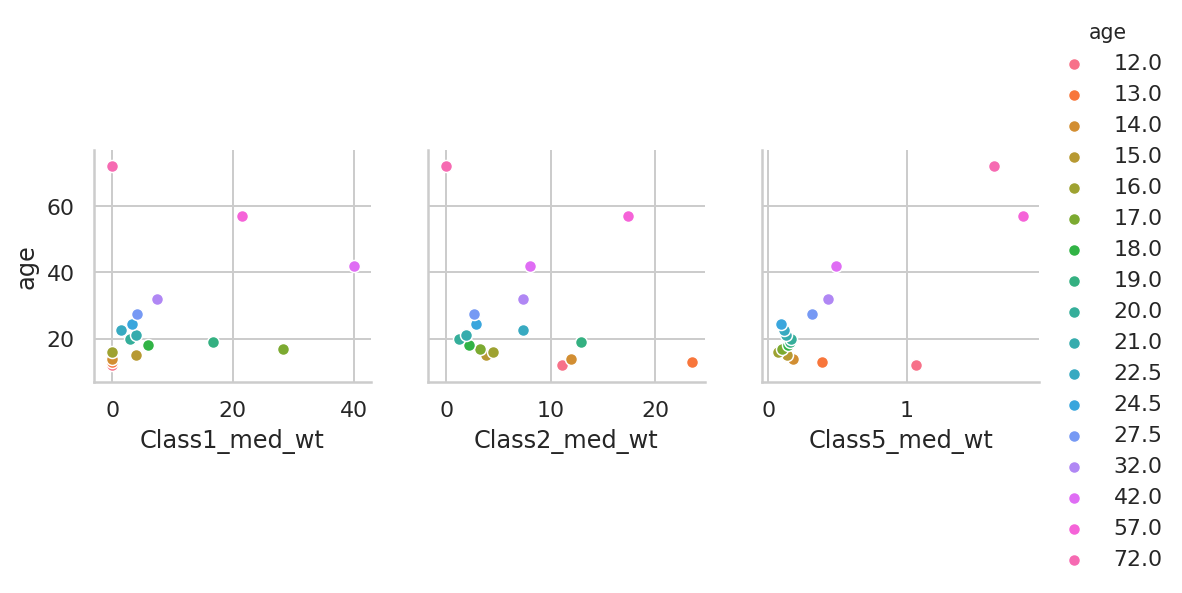

In [58]:
sns.pairplot(dfDrugFiltN,hue = 'age',diag_kind= {'hist'}, y_vars=['age'], x_vars =['Class1_med_wt', 'Class2_med_wt','Class5_med_wt'],palette="husl")

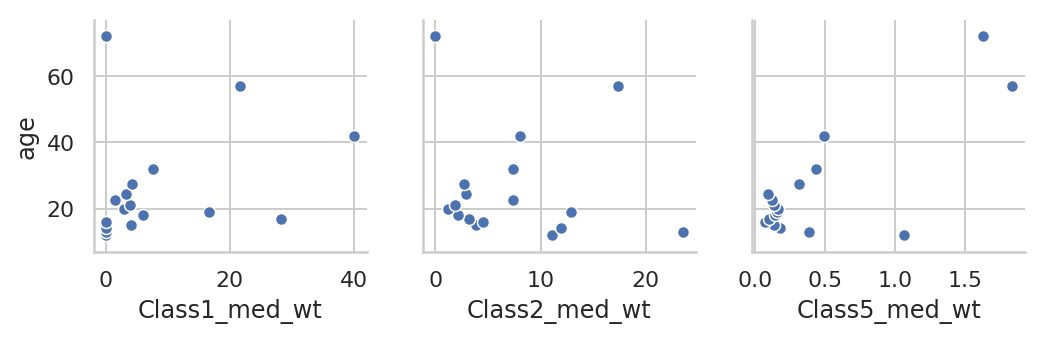

In [59]:
sns.pairplot(dfDrugFiltN, x_vars=['Class1_med_wt', 'Class2_med_wt','Class5_med_wt'],y_vars=['age'])

In [60]:
dfDrugFiltN.std()

age              16.527884
Class1_med_wt    11.615086
Class2_med_wt     6.411490
Class5_med_wt     0.547246
dtype: float64

In [61]:
dfDrugFiltN.sem()

age              4.008601
Class1_med_wt    2.817072
Class2_med_wt    1.555015
Class5_med_wt    0.132727
dtype: float64

In [62]:
dfDrugFiltN.corr()

,age,Class1_med_wt,Class2_med_wt,Class5_med_wt
age,1.000000,0.275278,-0.096573,0.783568
Class1_med_wt,0.275278,1.000000,0.104413,0.107269
Class2_med_wt,-0.096573,0.104413,1.000000,0.260089
Class5_med_wt,0.783568,0.107269,0.260089,1.000000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


1)Write a specific question you would like to answer with the data (that can be accomplished with EDA).

#NULL HYPOTHESIS: 

#All other things being the same, abuse using Class 2 drugs is same for all age groups than Class 5 drugs


#ALTERNATE HYPOTHESIS

#All other things being the same, abuse using Class 2 drugs is different/greater for all age groups than Class 5 drugs



Write a description of the "deliverables": what will you report after testing/examining your hypothesis?

1) Do EDA,  (refer 7.1 & 7.2 above)
2) Clean up data  (refer 7.1 & 7.2 above)
3) Things learned  (refer 7.1 & 7.2 above)
4) P-value  (Given below)
5) T-Statistic (Given below)




Use EDA techniques of your choice, numeric and/or visual, to look into your question.


Write up your report on what you have found regarding the hypothesis about the data you came up with.

Please refer ppt for more details

NUll hypotheses is rejected as p-value is less than 0.05

All other things being the same, abuse using Class 2 drugs is different/greater for all age groups than Class 5 drugs

In [63]:
#stats.ttest_ind(experimental, control)
# 
# experimental -  'Class2_med_wt'  for all age groups
# control - 'Class5_med_wt' for all age groups
#Class 1 not chosen as there is no comparison with class 2 which are prescription drugs
# Mean hypotheses:Abuse using Class 2 drugs is same as that of Class 5 drugs for all age groups 
#Alternate Hypothesis:   Abuse using Class 2 drugs is different/more than that of Class 5 drugs for all age groups 


experimental = list(dfDrugFiltN['Class2_med_wt'])
experimental
control = list(dfDrugFiltN['Class5_med_wt'])
control
stats.ttest_ind(experimental, control)


Ttest_indResult(statistic=4.323441644606024, pvalue=0.00014003148590394497)

In [64]:
print(np.mean(experimental) - np.mean(control))

6.747460812698134


In [65]:
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-6, 6, 500)

#  #  same for both samples
size = 17
print(size)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (size + size -2), 0, 1)

17


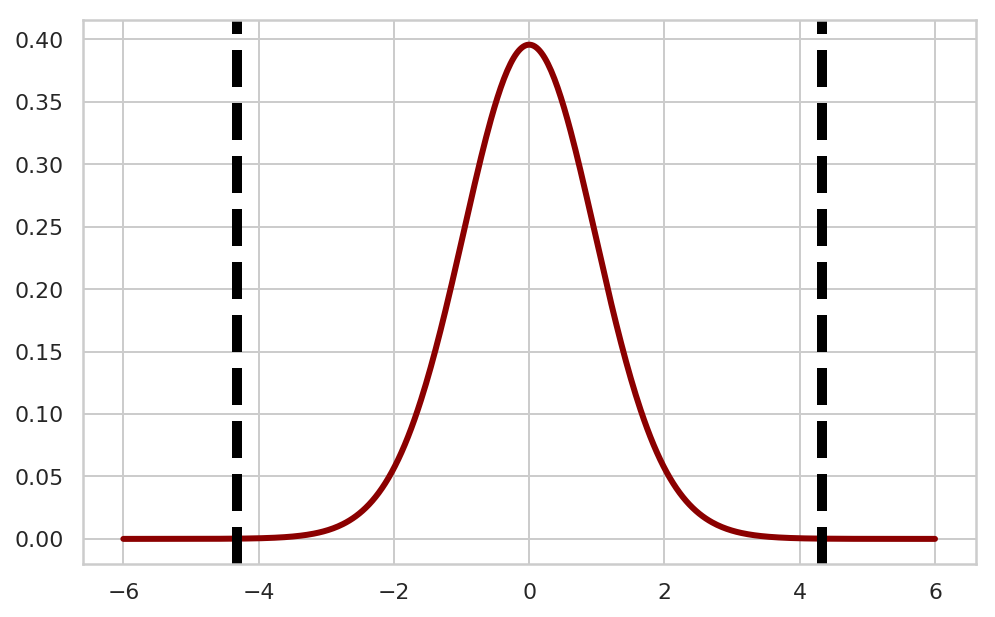

In [66]:
# initialize a matplotlib "figure"
t_stat = 4.323441644606024

fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

In [67]:
#Our p-value corresponds to the area under the curve of the distribution
#where the magnitude of the t-statistic is greater than or equal to the one we measured
#(shown with dotted lines.)
#The stats.t.cdf function is the cumulative distribution function 
#and will calculate the area under the curve up to a specified t-statistic.
#Calculate the area under the tails of the t-distribution 
#beyond the dotted lines using the cdf function to verify that 
#it is the same as the p-value calculated by scipy.


Sipy_pvalue=0.00014003148590394497



lower_tail = stats.t.cdf(-t_stat, (size + size-2), 0, 1)
upper_tail = 1. - stats.t.cdf(t_stat, (size + size -2), 0, 1)
p_value = lower_tail+upper_tail
print(p_value)
print(size)
### 6 in 100 samples may have a +/_   1.89

print(Sipy_pvalue)


0.00014003148590392906
17
0.00014003148590394497


In [ ]:
###Null Hypothesis is rejected

In [217]:
stats.t.interval([0.05], experimental, loc=0, scale=1) 

(array([-0.06414177, -0.06337774, -0.06403593, -0.06688931, -0.06624942,
        -0.067744  , -0.07022861, -0.06393451, -0.07559187, -0.07142127,
        -0.06487255, -0.06828578, -0.06866664, -0.06487254, -0.06469353,
        -0.06361756,         nan]),
 array([0.06414177, 0.06337774, 0.06403593, 0.06688931, 0.06624942,
        0.067744  , 0.07022861, 0.06393451, 0.07559187, 0.07142127,
        0.06487255, 0.06828578, 0.06866664, 0.06487254, 0.06469353,
        0.06361756,        nan]))

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


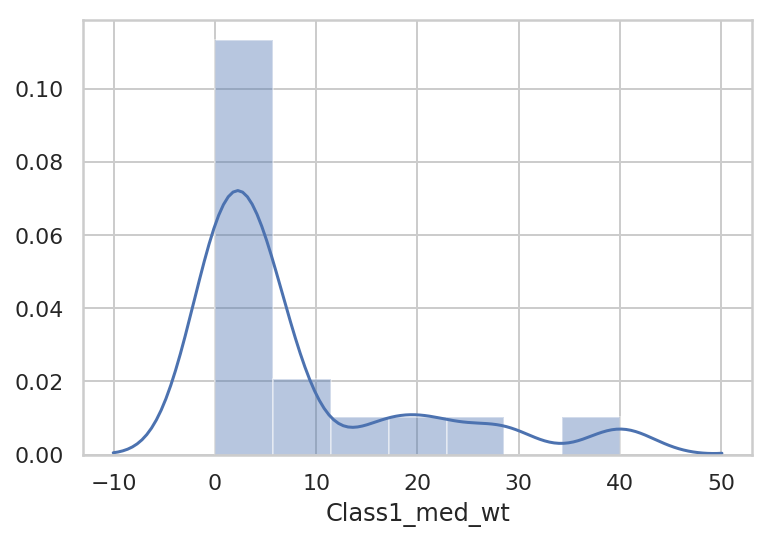

In [68]:
sns.distplot(dfDrugFiltN['Class1_med_wt'],kde = True)


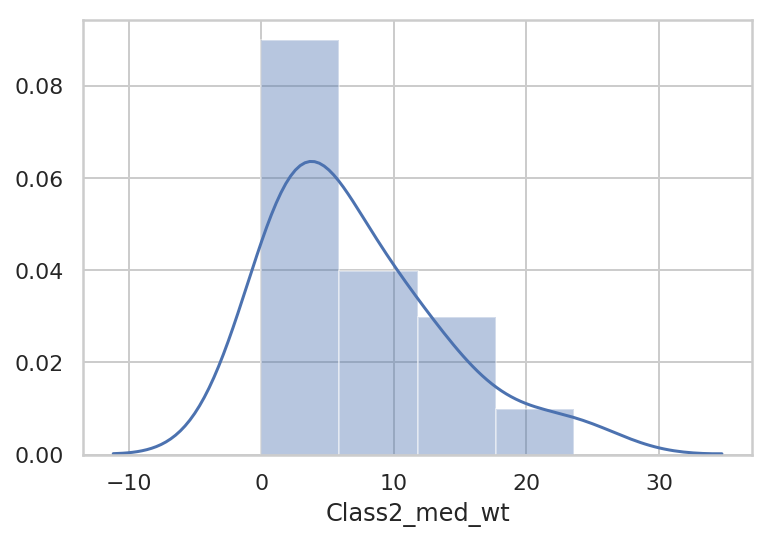

In [69]:
sns.distplot(dfDrugFiltN['Class2_med_wt'],kde = True)

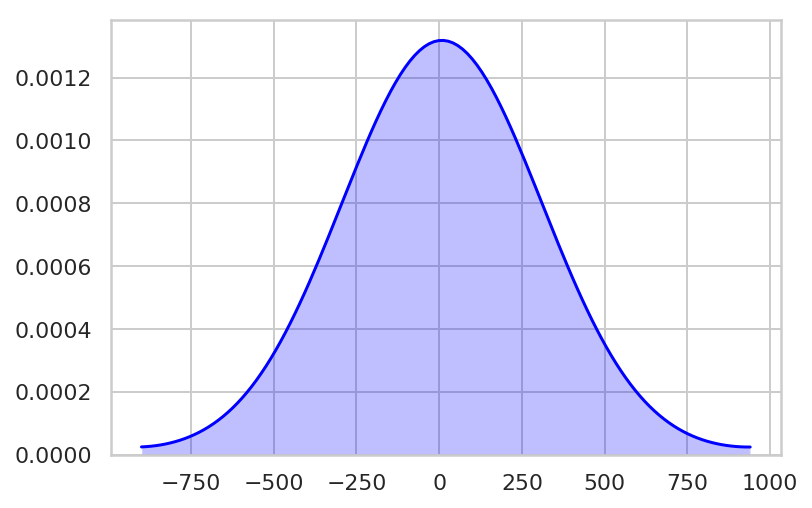

In [70]:
sns.kdeplot(data=dfDrugFiltN['Class1_med_wt'],shade=True, color="blue",  bw=300, legend=False)

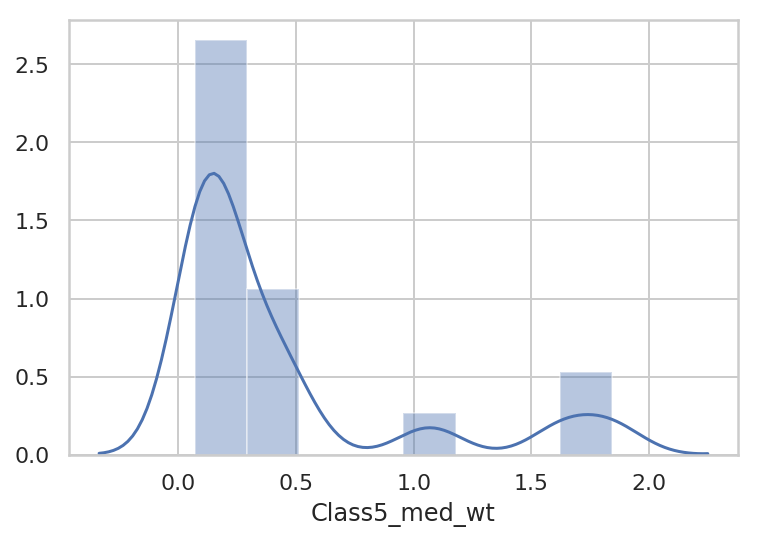

In [71]:
sns.distplot(dfDrugFiltN['Class5_med_wt'],kde = True)

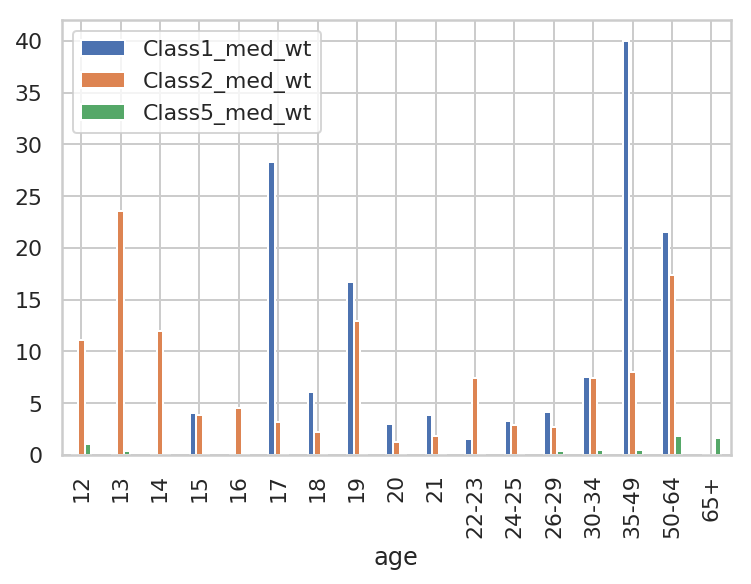

In [106]:
dfDrugFilt.plot(kind='bar', x='age', y=['Class1_med_wt','Class2_med_wt','Class5_med_wt'])

age
12.0    AxesSubplot(0.125,0.125;0.775x0.755)
13.0    AxesSubplot(0.125,0.125;0.775x0.755)
14.0    AxesSubplot(0.125,0.125;0.775x0.755)
15.0    AxesSubplot(0.125,0.125;0.775x0.755)
16.0    AxesSubplot(0.125,0.125;0.775x0.755)
17.0    AxesSubplot(0.125,0.125;0.775x0.755)
18.0    AxesSubplot(0.125,0.125;0.775x0.755)
19.0    AxesSubplot(0.125,0.125;0.775x0.755)
20.0    AxesSubplot(0.125,0.125;0.775x0.755)
21.0    AxesSubplot(0.125,0.125;0.775x0.755)
22.5    AxesSubplot(0.125,0.125;0.775x0.755)
24.5    AxesSubplot(0.125,0.125;0.775x0.755)
27.5    AxesSubplot(0.125,0.125;0.775x0.755)
32.0    AxesSubplot(0.125,0.125;0.775x0.755)
42.0    AxesSubplot(0.125,0.125;0.775x0.755)
57.0    AxesSubplot(0.125,0.125;0.775x0.755)
72.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

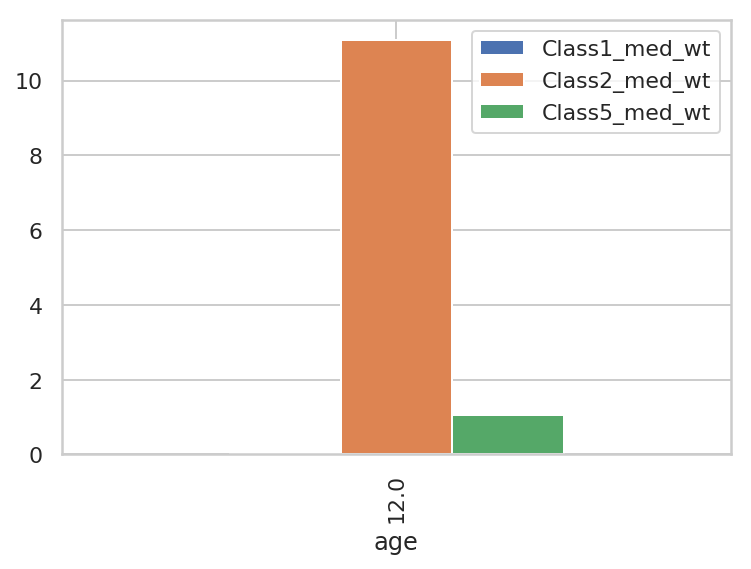

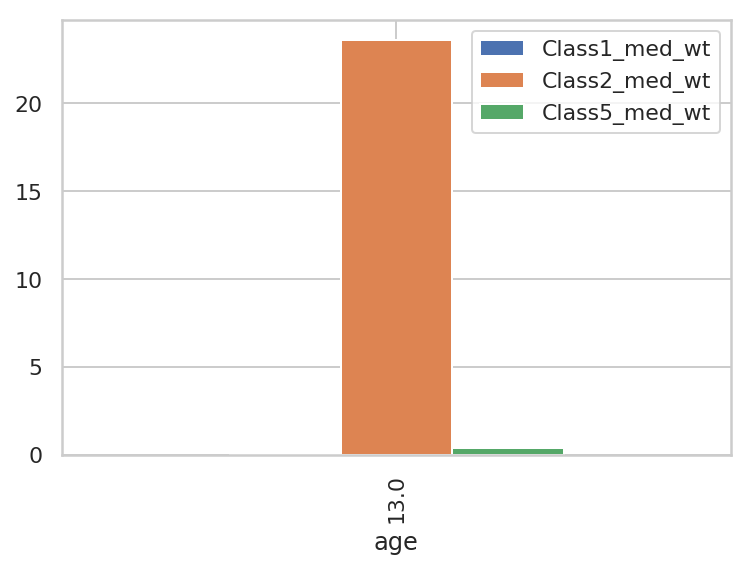

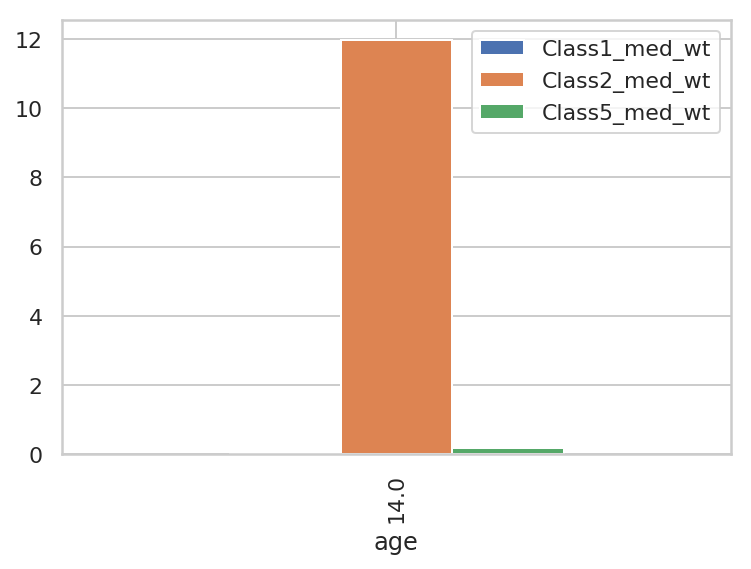

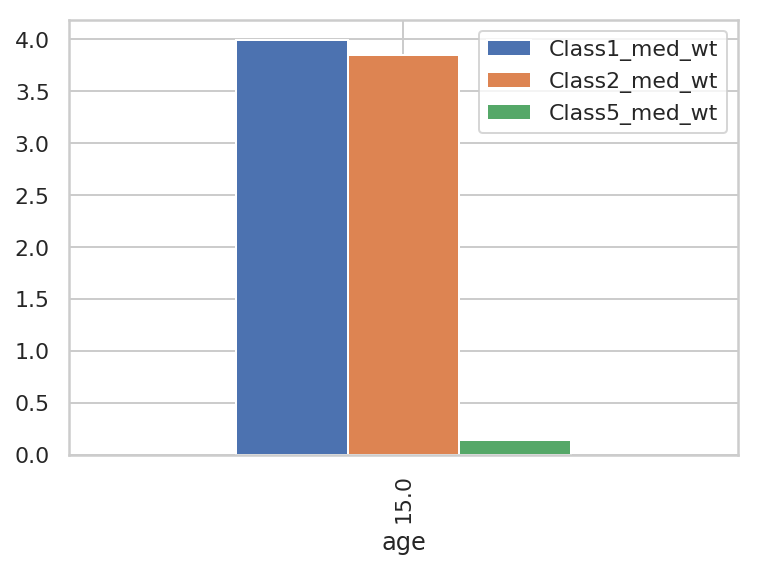

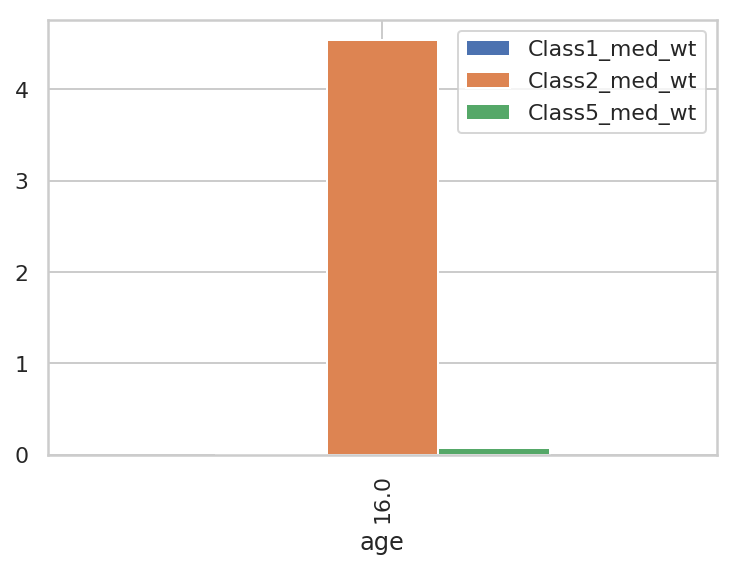

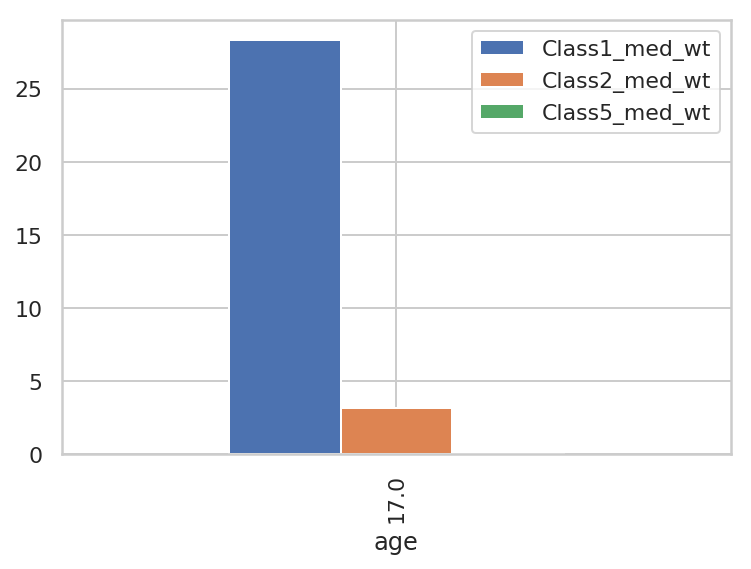

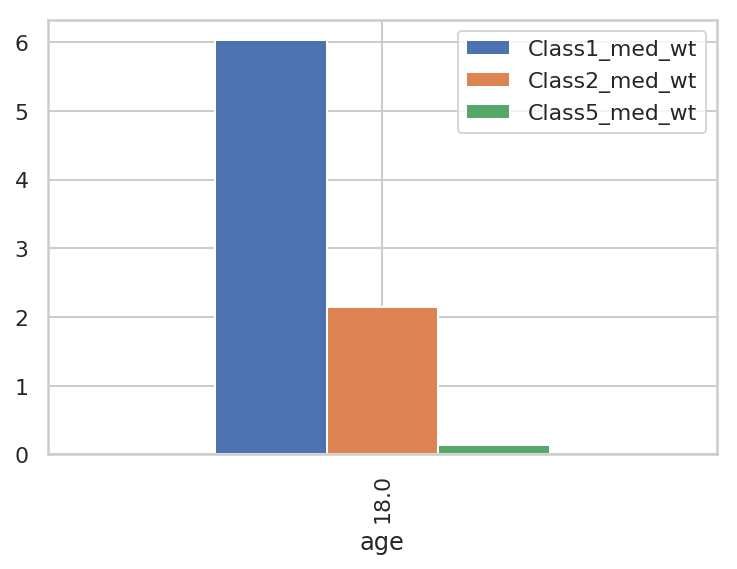

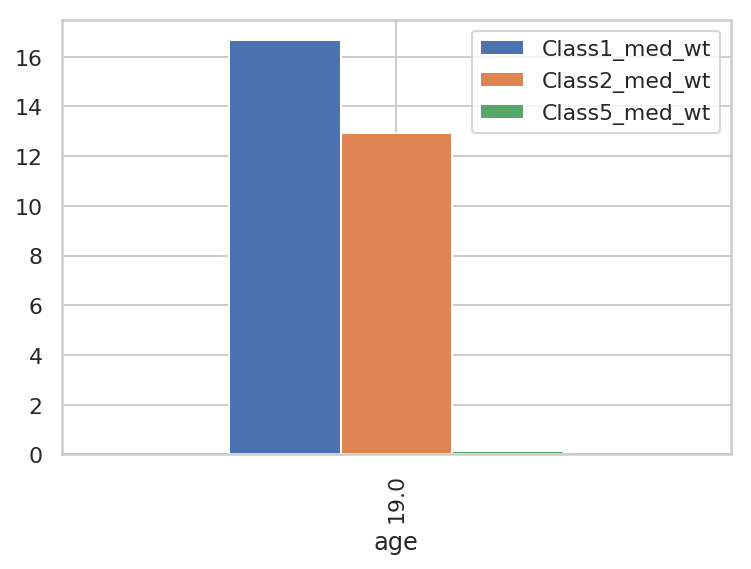

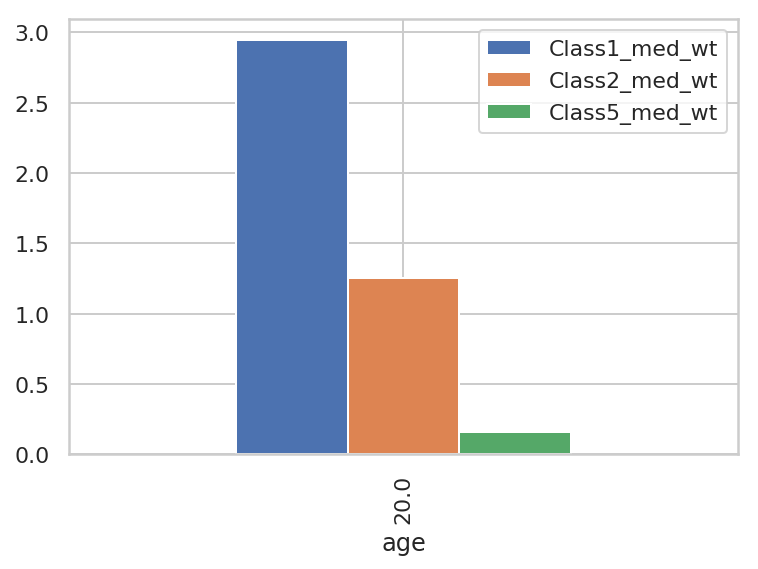

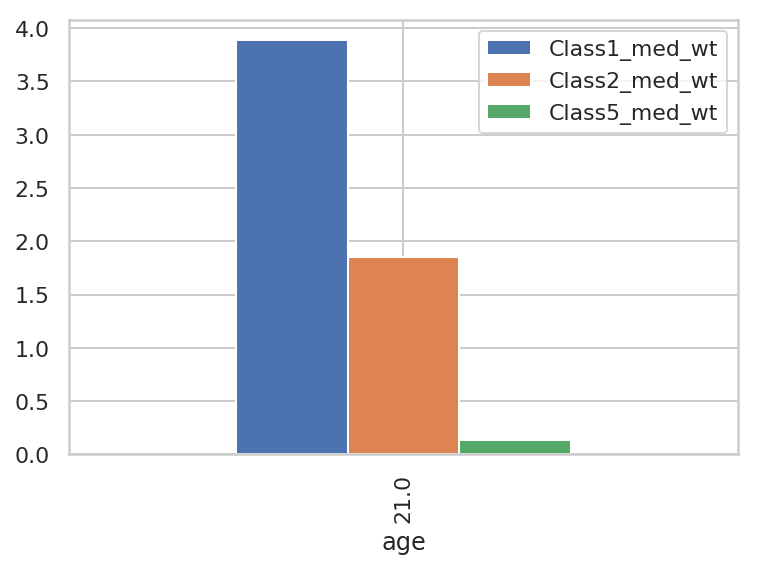

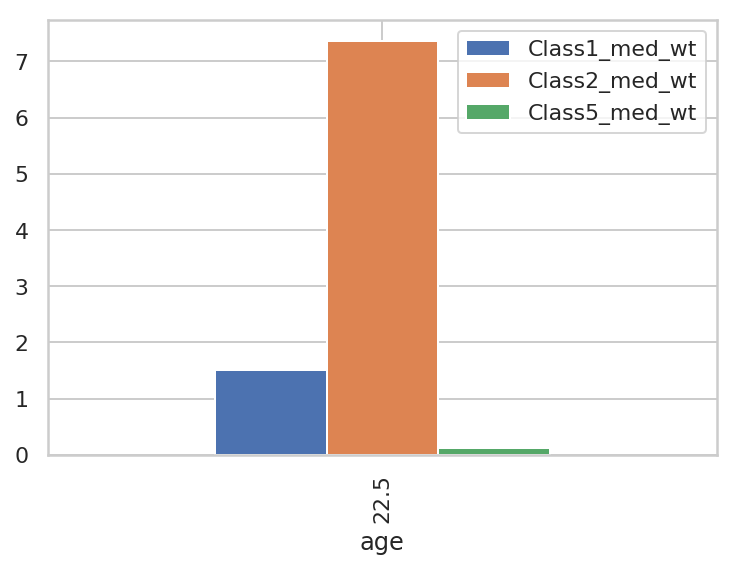

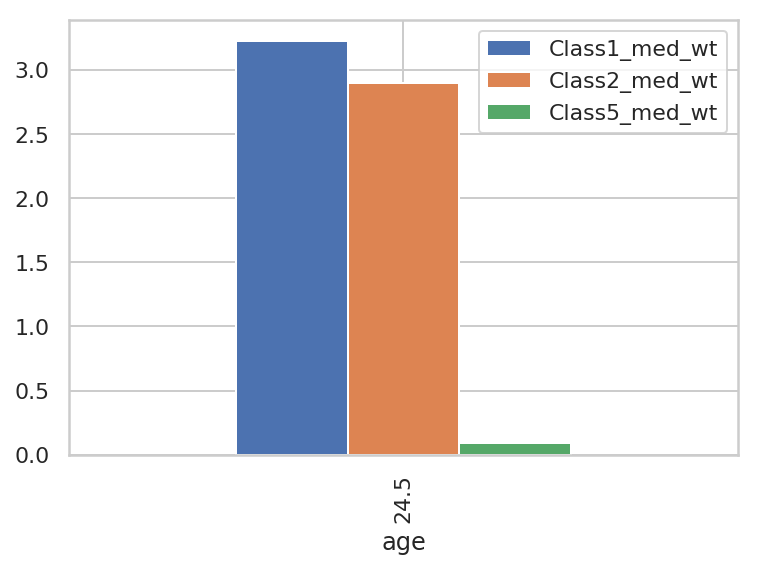

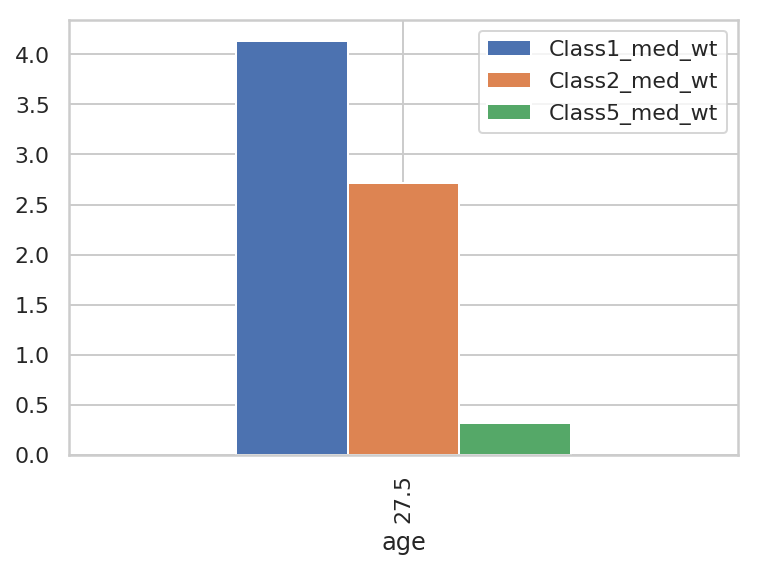

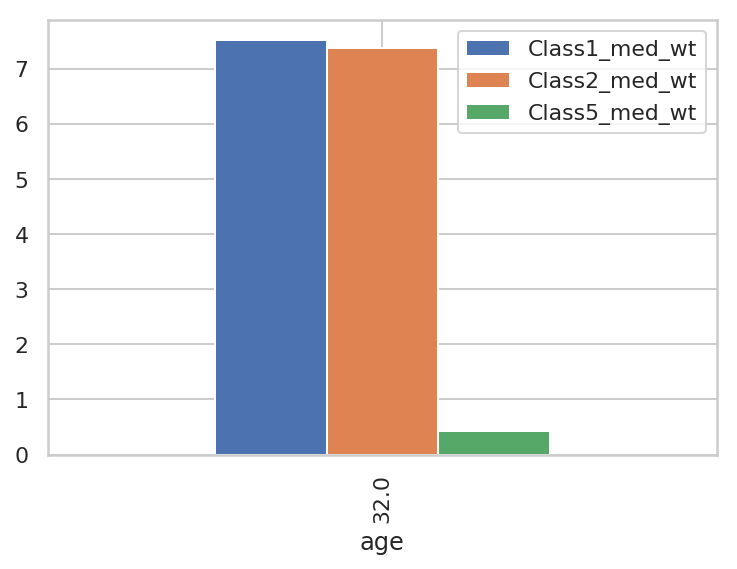

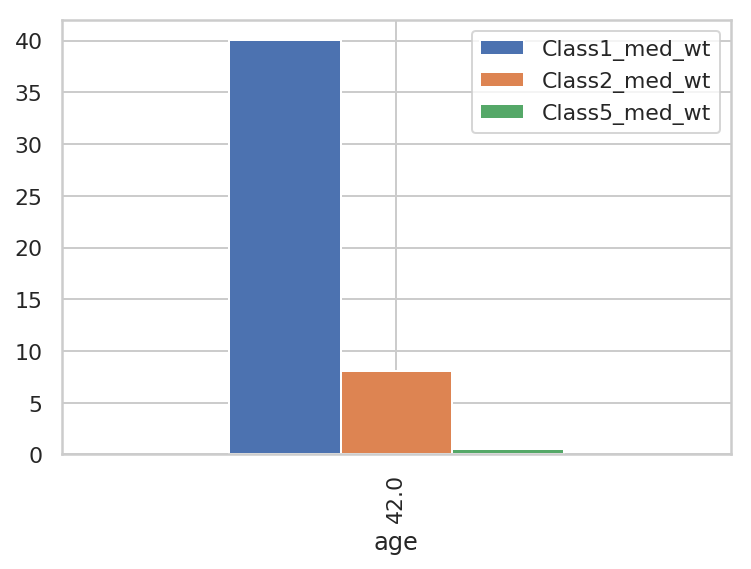

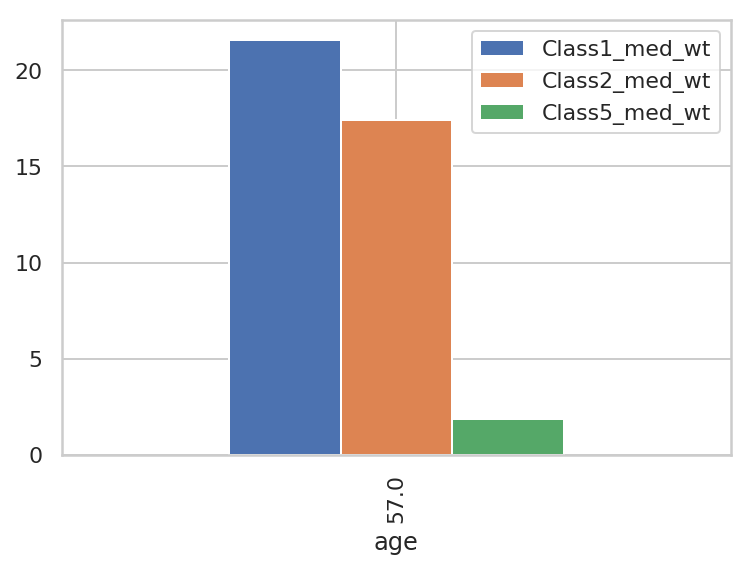

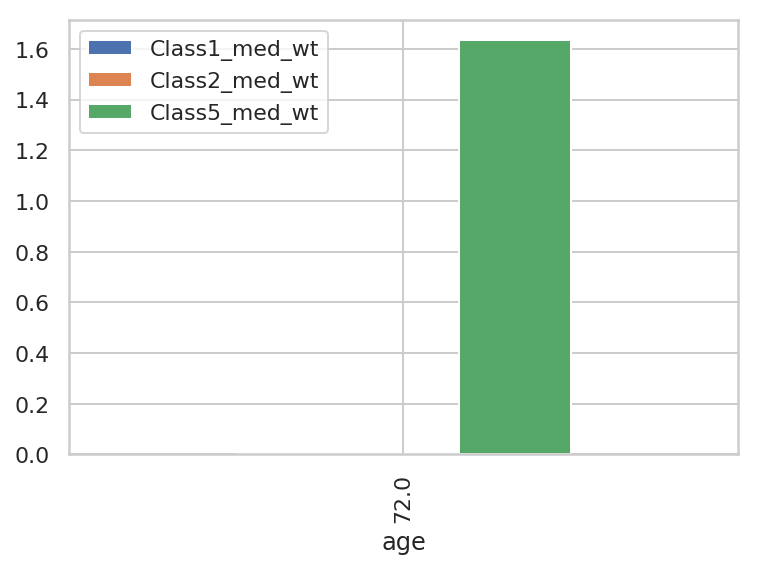

In [94]:
dfDrugFiltN.groupby('age').plot(kind='bar', x = 'age', sharey= True)

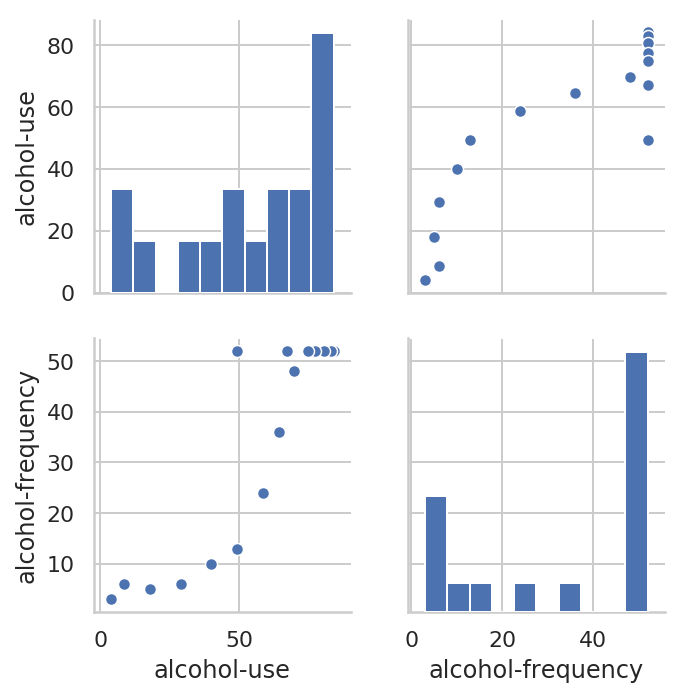

In [73]:
sns.pairplot(dfDrug, vars=["alcohol-use", "alcohol-frequency"])


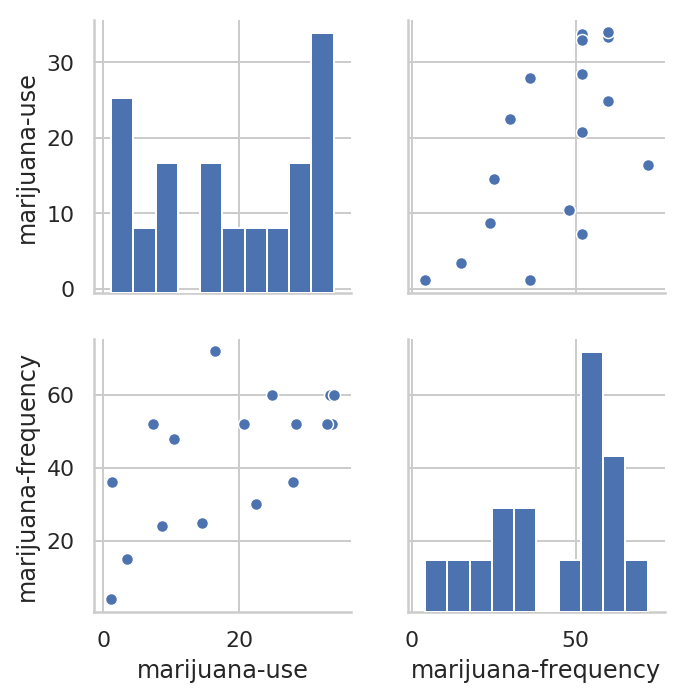

In [74]:
sns.pairplot(dfDrug, vars=["marijuana-use", "marijuana-frequency"])
#sns.pairplot(["marijuana-use", "marijuana-frequency"])

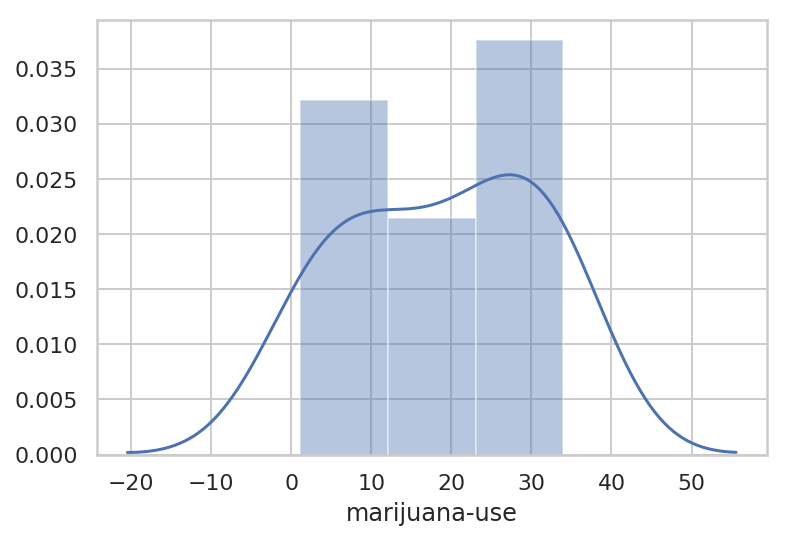

In [75]:
sns.distplot(dfDrug['marijuana-use'],kde = True)

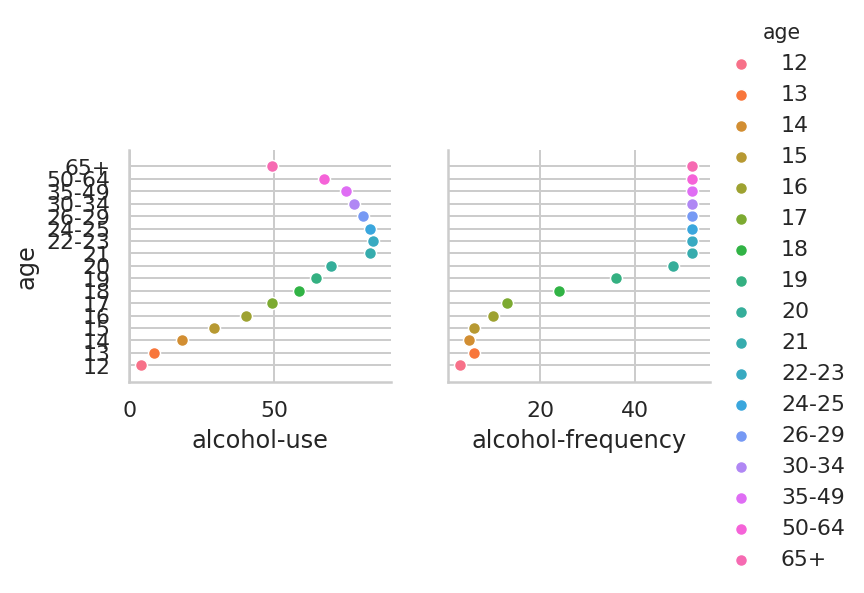

In [76]:
sns.pairplot(dfDrug,hue = 'age', diag_kind= {'hist'}, y_vars=['age'], x_vars =["alcohol-use", "alcohol-frequency"])

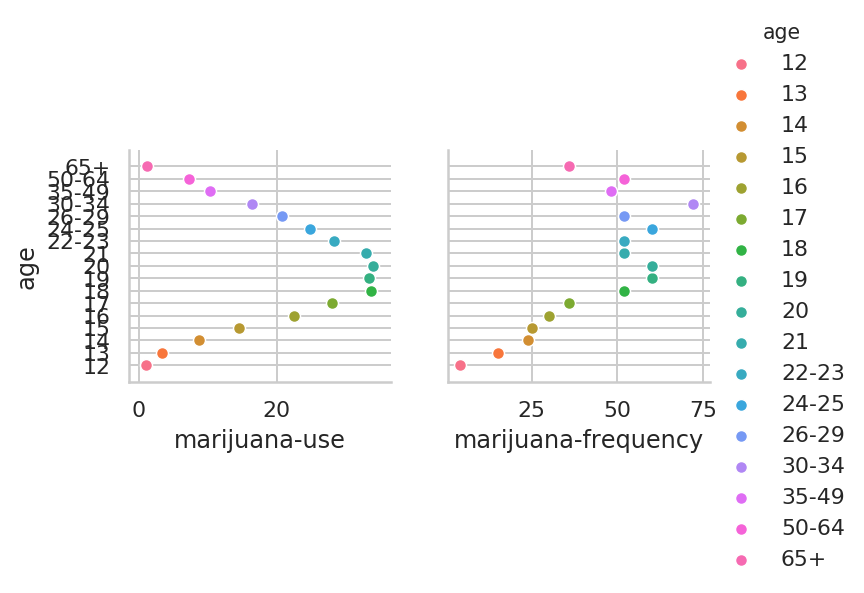

In [77]:
sns.pairplot(dfDrug,hue = 'age', diag_kind= {'hist'}, y_vars=['age'], x_vars =["marijuana-use", "marijuana-frequency"])

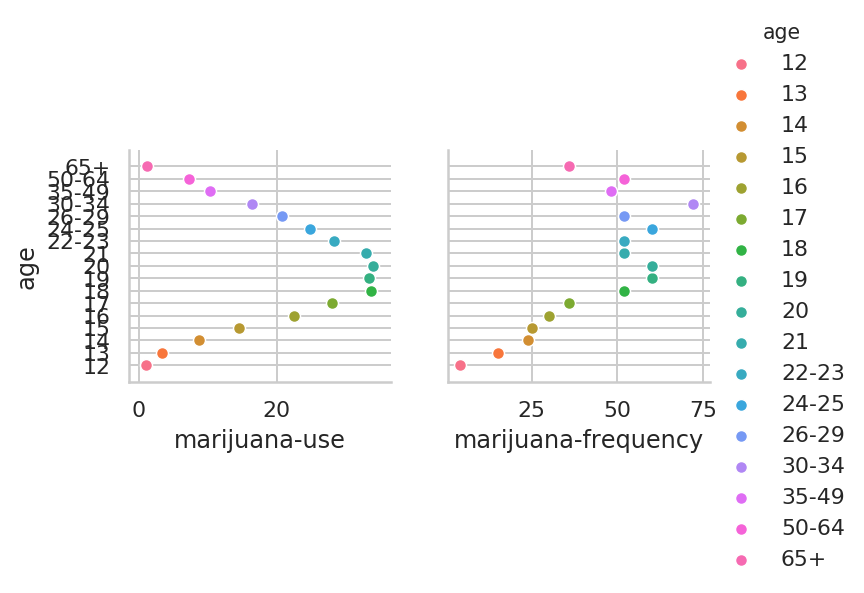

In [78]:
sns.pairplot(dfDrug,hue = 'age', diag_kind= {'hist'}, y_vars=['age'], x_vars =["marijuana-use", "marijuana-frequency"])

In [ ]:
#sns.distplot(['age', 'marijuana-frequency'],kde = True)

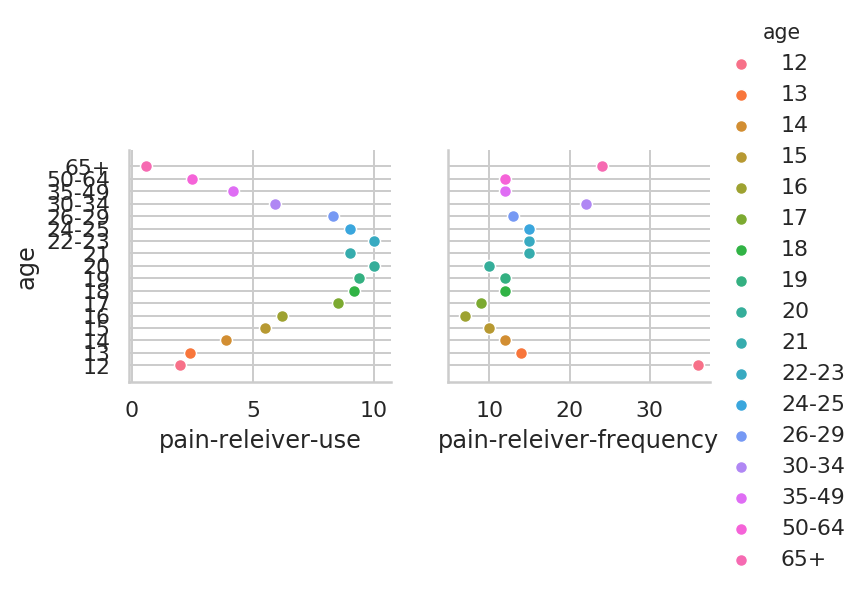

In [79]:
#pain-releiver-use,pain-releiver-frequency 
sns.pairplot(dfDrug,hue = 'age', diag_kind= {'hist'}, y_vars=['age'], x_vars =["pain-releiver-use", "pain-releiver-frequency"])

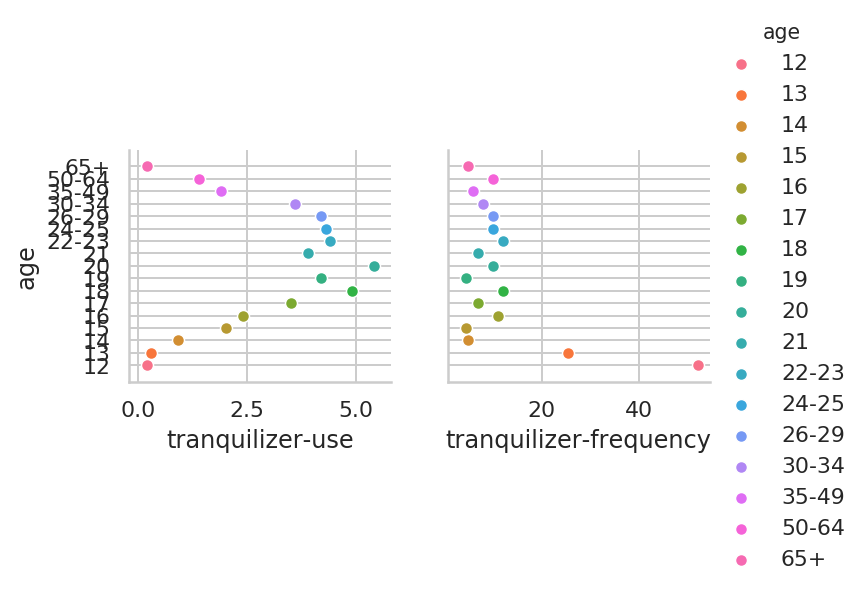

In [80]:
#tranquilizer-use,tranquilizer-frequency 

sns.pairplot(dfDrug,hue = 'age', diag_kind= {'hist'}, y_vars=['age'], x_vars =["tranquilizer-use", "tranquilizer-frequency"])

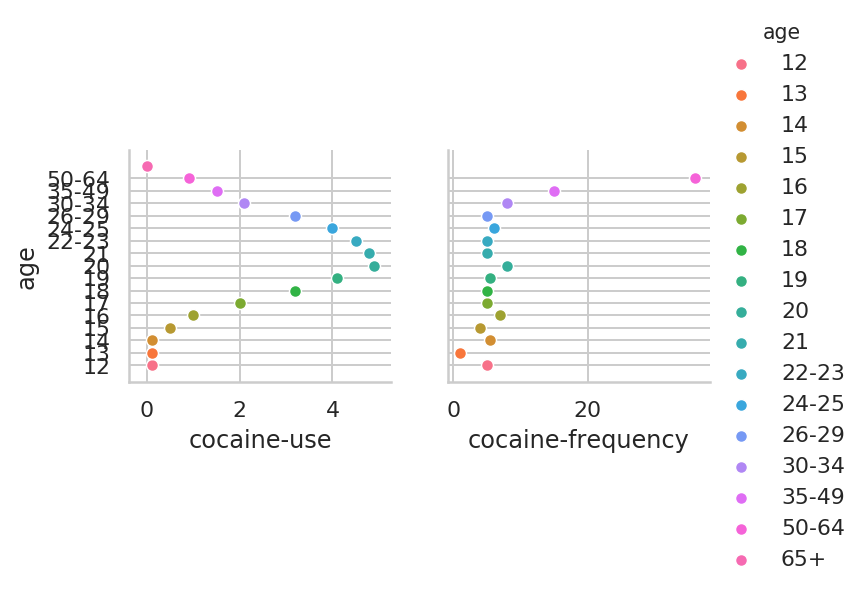

In [81]:
#'cocaine-use','cocaine-frequency'
sns.pairplot(dfDrug,hue = 'age', diag_kind= {'hist'}, y_vars=['age'], x_vars =['cocaine-use','cocaine-frequency'])

In [ ]:
dfDrugFilt.plot(kind='barh', x='age', y=['marijuana-use','marijuana-frequency'])

Text(0, 0.5, 'frequency')

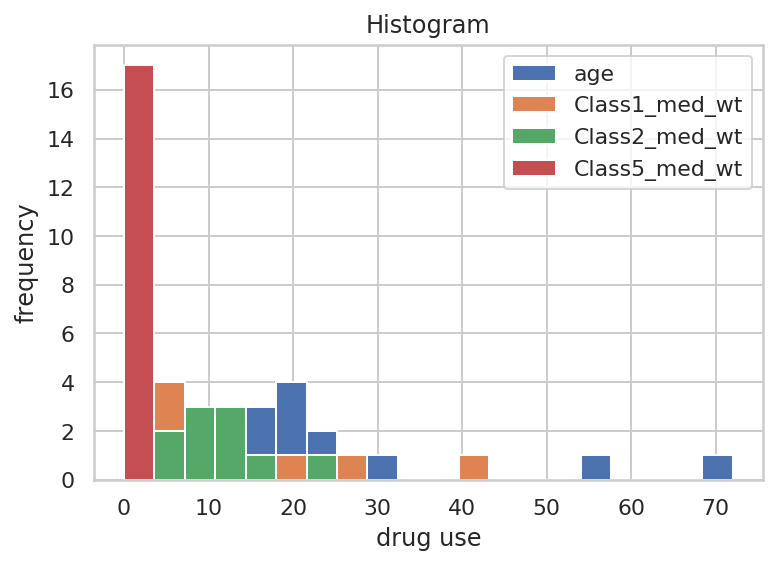

In [112]:

dfDrugFiltN.plot(kind='hist', bins=20, title='Histogram')
plt.xlabel('drug use')
plt.ylabel('frequency')



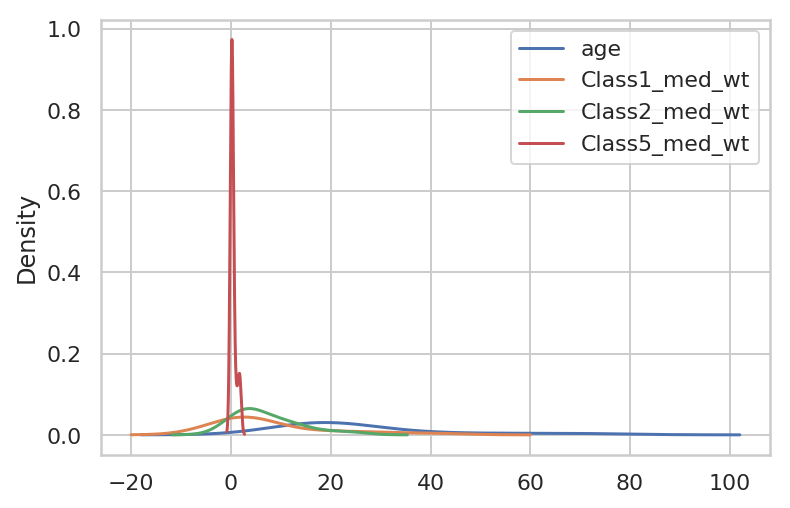

In [115]:
#dfDrugFiltN.plot(kind='density')



In [ ]:
sns.pairplot(dfDrugFilt,hue = 'age', y_vars=['age'], x_vars =["marijuana-use", "marijuana-frequency"])

In [111]:

dfDrugFiltN.boxplot(by ='age')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
### with rate variable
#  Outliers is when datapoint is 25% interquatile range - 1.5 SD
#or when datapoint is 75% interquatile range + 1.5 SD
#df.describe()



<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [54]:
dfVM = df[['Verbal', 'Math']]

#dfVM
#dfpear = df.corr()
#dfpear

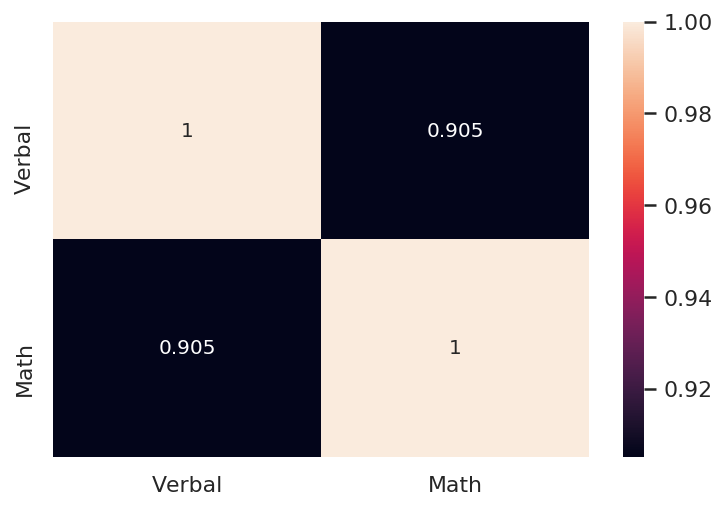

In [61]:
sns.heatmap(dfVM.corr(method = 'spearman'),annot = True,  fmt = '.3g')
### compares the 

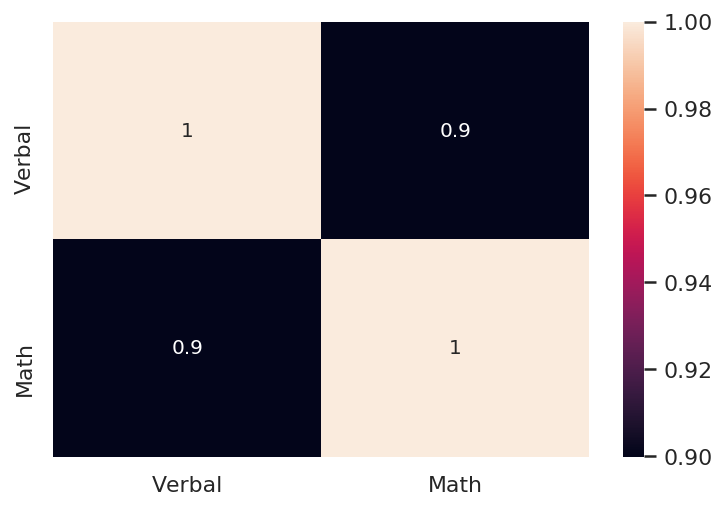

In [56]:
sns.heatmap(dfVM.corr(),annot = True,  fmt = '.3g')

/Users/pramodpaul/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


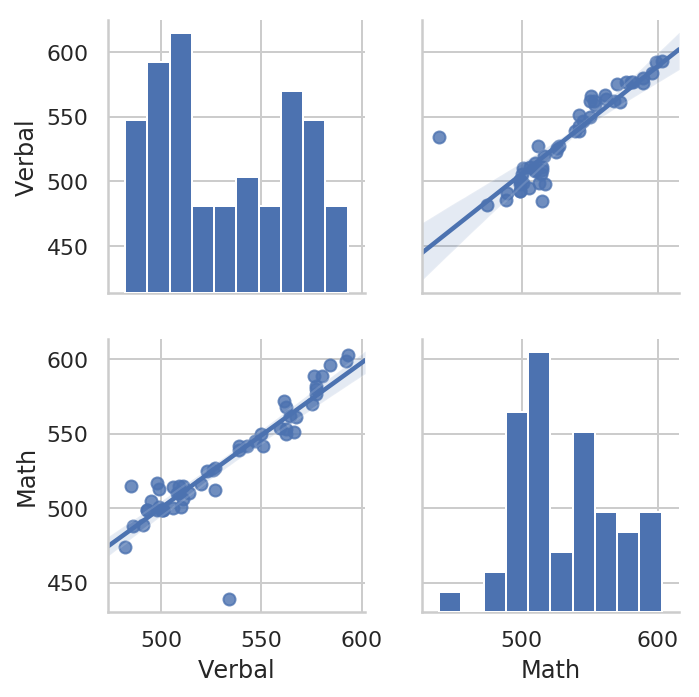

In [59]:
sns.pairplot(dfVM, kind = 'reg')

In [60]:
### Default is pearson's coeffiecient -  used for linear relationships
df.corr(method = 'spearman',min_periods=1)   #  spearman for non linear relation ships


,Rate,Verbal,Math
Rate,1.000000,-0.833294,-0.813275
Verbal,-0.833294,1.000000,0.905205
Math,-0.813275,0.905205,1.000000


In [62]:
#percentiles are plotted for spearman,  values are plotted for pearson...How is the rank coming up for this?

stats.spearmanr(dfVM)

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [ ]:
## lower quartile  = rate.quartile(0.25)
## upper quartile = rate.quartile(0.75)

## IQR  = q3 - q1


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.